# Подключение библиотек

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.inspection import PartialDependenceDisplay
from catboost import CatBoostClassifier

import shap
from matplotlib import pyplot as plt
import seaborn as sns

# EDA

In [2]:
population_dict = {
    "Visakhapatnam": 2000000,
    "Bangalore": 8400000,
    "Srinagar": 100000,
    "Varanasi": 1200000,
    "Jaipur": 3100000,
    "Pune": 3100000,
    "Thane": 1800000,
    "Chennai": 7100000,
    "Nagpur": 2400000,
    "Nashik": 1500000,
    "Vadodara": 2100000,
    "Kalyan": 1600000,
    "Rajkot": 1300000,
    "Ahmedabad": 5600000,
    "Kolkata": 4500000,
    "Mumbai": 12400000,
    "Lucknow": 3400000,
    "Indore": 2000000,
    "Surat": 6100000,
    "Ludhiana": 1600000,
    "Bhopal": 1800000,
    "Meerut": 1300000,
    "Agra": 1600000,
    "Ghaziabad": 1600000,
    "Hyderabad": 6800000,
    "Vasai-Virar": 1200000,
    "Kanpur": 2800000,
    "Patna": 2100000,
    "Faridabad": 1400000,
    "Delhi": 16800000
}

corrections = {
    "Nalyan": "Kalyan",
    "Khaziabad": "Ghaziabad",
    "Less Delhi": "Delhi",
    "Less than 5 Kalyan": "Kalyan"
}

In [3]:
df = pd.read_csv(r'data/Student Depression Dataset.csv')
df = df.dropna(axis=0)
df = df.rename(columns={
    'Have you ever had suicidal thoughts ?': 'SuicidalThoughts'
})
df_numeric = df.copy()
df_numeric = df_numeric.rename(columns={'Gender': 'Male'})
df_numeric['City'] = df_numeric['City'].replace(corrections)
df_numeric["city_population"] = df_numeric['City'].map(population_dict)
df_numeric["city_is_other"] = df_numeric["city_population"].isna().astype(int)
df_numeric["city_population"] = df_numeric["city_population"].fillna(0)
df_numeric = df_numeric.drop(['City'], axis=1)
df_numeric = pd.get_dummies(df_numeric, drop_first=True)
df_numeric

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression,...,Degree_MBBS,Degree_MCA,Degree_MD,Degree_ME,Degree_MHM,Degree_MSc,Degree_Others,Degree_PhD,SuicidalThoughts_Yes,Family History of Mental Illness_Yes
0,2,33.0,5.0,0.0,8.97,2.0,0.0,3.0,1.0,1,...,False,False,False,False,False,False,False,False,True,False
1,8,24.0,2.0,0.0,5.90,5.0,0.0,3.0,2.0,0,...,False,False,False,False,False,False,False,False,False,True
2,26,31.0,3.0,0.0,7.03,5.0,0.0,9.0,1.0,0,...,False,False,False,False,False,False,False,False,False,True
3,30,28.0,3.0,0.0,5.59,2.0,0.0,4.0,5.0,1,...,False,False,False,False,False,False,False,False,True,True
4,32,25.0,4.0,0.0,8.13,3.0,0.0,1.0,1.0,0,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,27.0,5.0,0.0,5.75,5.0,0.0,7.0,1.0,0,...,False,False,False,False,False,False,False,False,True,True
27897,140686,27.0,2.0,0.0,9.40,3.0,0.0,0.0,3.0,0,...,False,False,False,False,False,True,False,False,False,True
27898,140689,31.0,3.0,0.0,6.61,4.0,0.0,12.0,2.0,0,...,False,False,True,False,False,False,False,False,False,False
27899,140690,18.0,5.0,0.0,6.88,2.0,0.0,10.0,5.0,1,...,False,False,False,False,False,False,False,False,True,False


In [4]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27898 entries, 0 to 27900
Data columns (total 62 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    27898 non-null  int64  
 1   Age                                   27898 non-null  float64
 2   Academic Pressure                     27898 non-null  float64
 3   Work Pressure                         27898 non-null  float64
 4   CGPA                                  27898 non-null  float64
 5   Study Satisfaction                    27898 non-null  float64
 6   Job Satisfaction                      27898 non-null  float64
 7   Work/Study Hours                      27898 non-null  float64
 8   Financial Stress                      27898 non-null  float64
 9   Depression                            27898 non-null  int64  
 10  city_population                       27898 non-null  float64
 11  city_is_other       

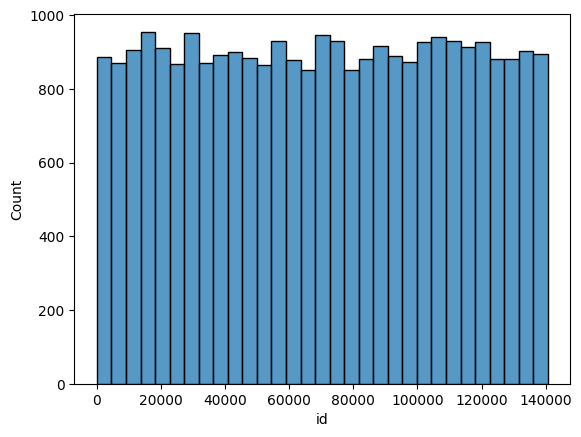

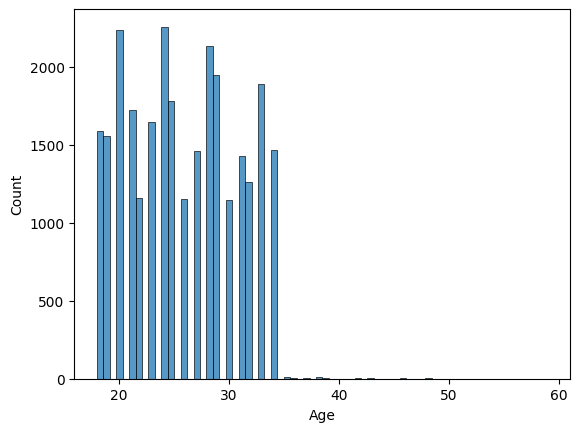

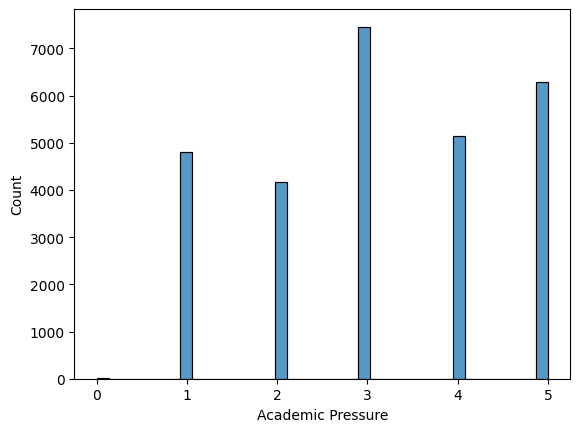

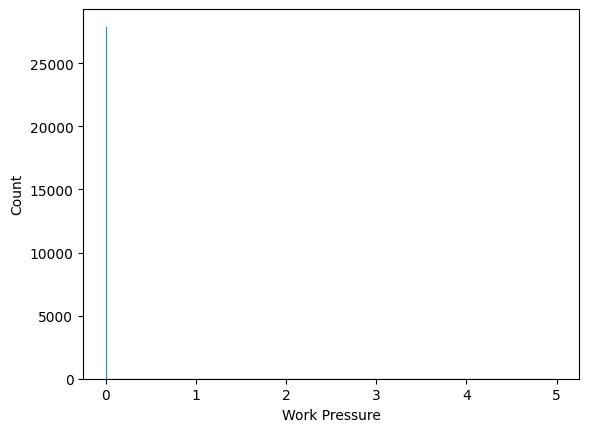

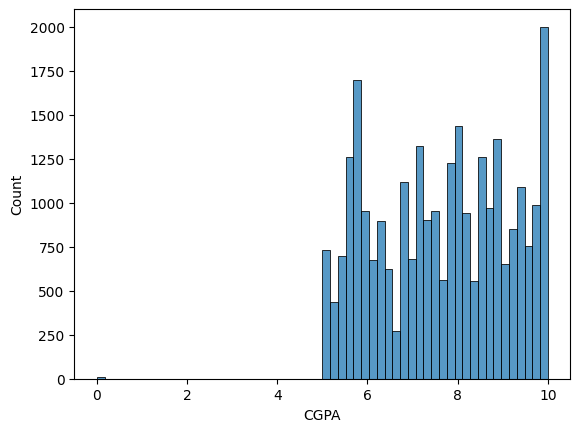

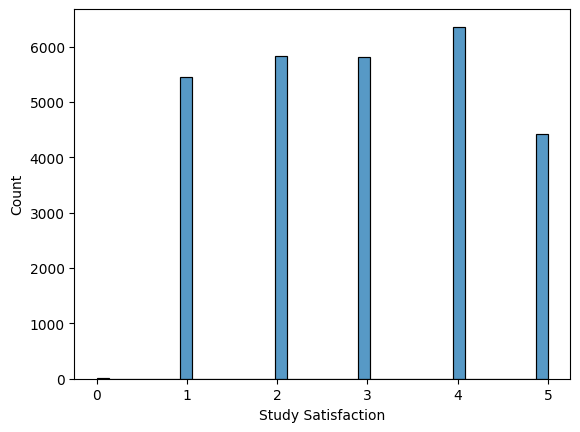

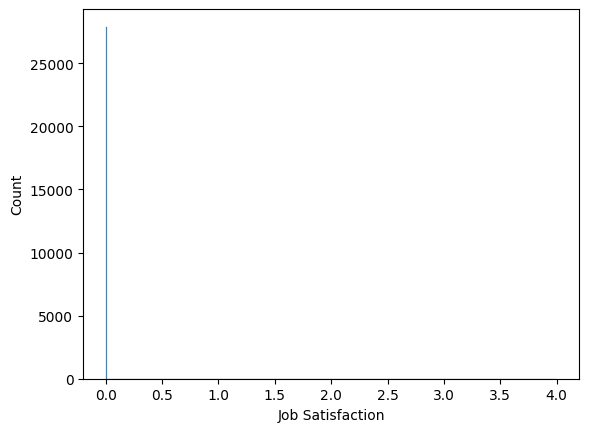

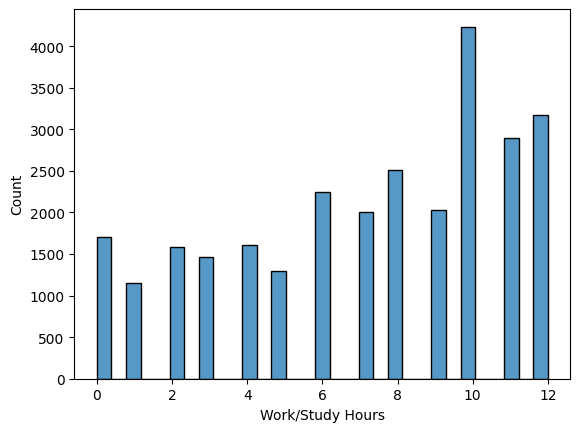

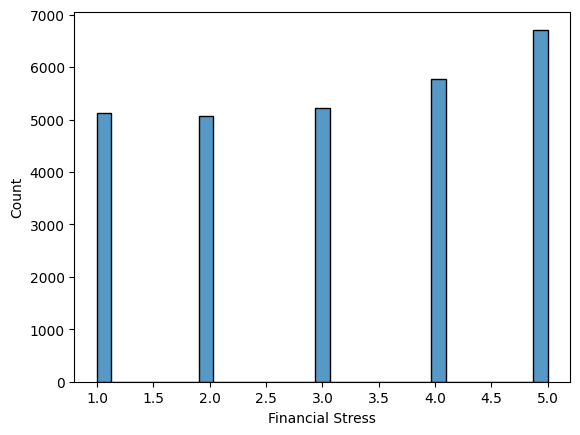

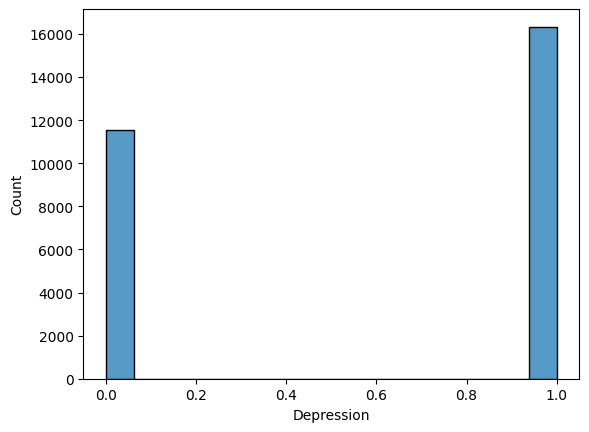

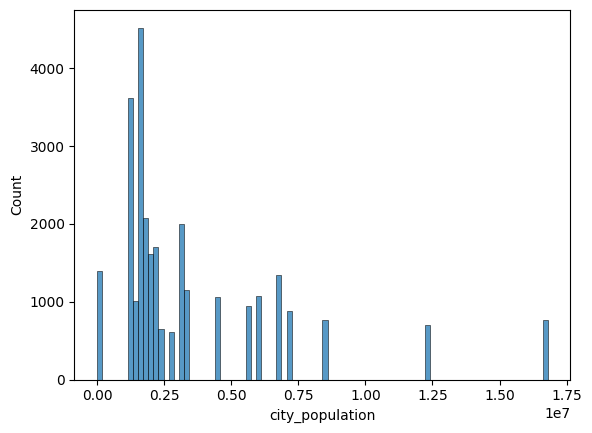

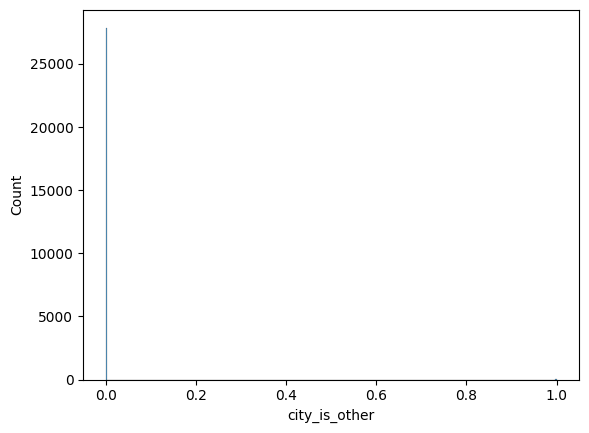

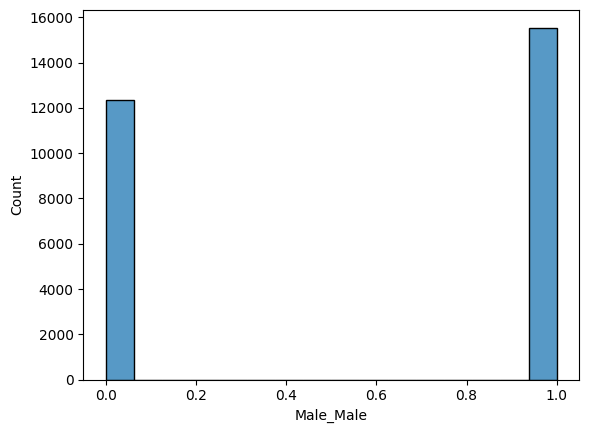

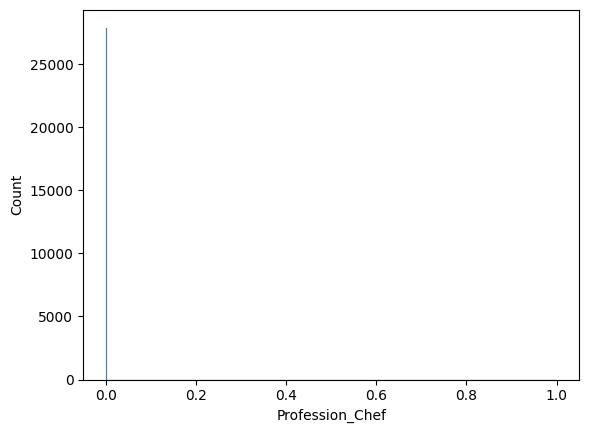

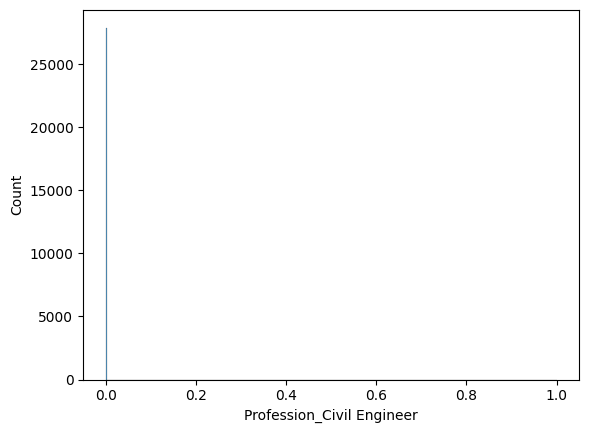

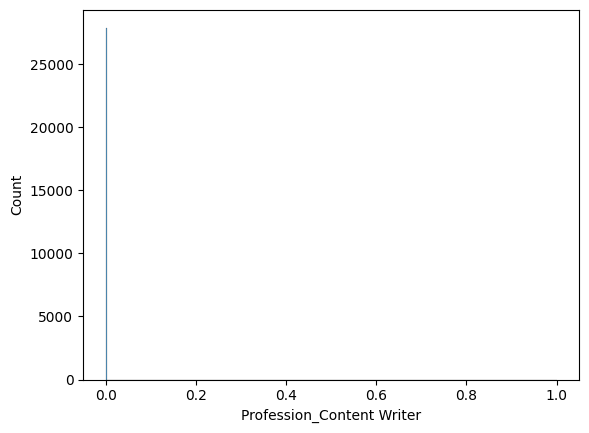

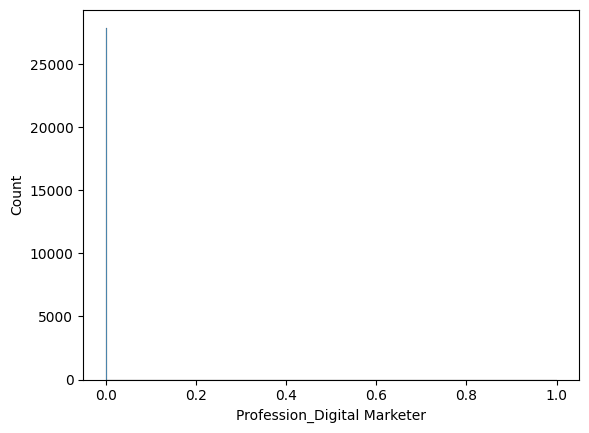

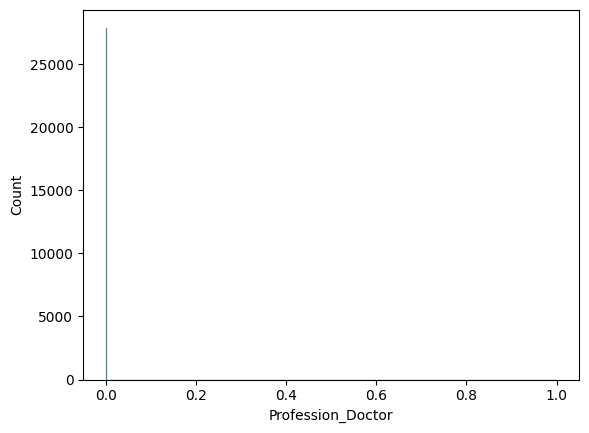

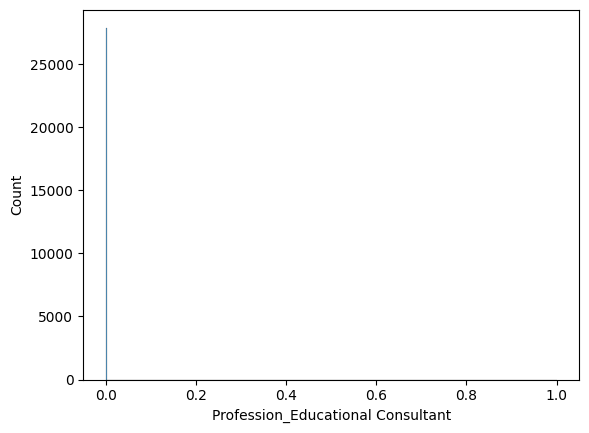

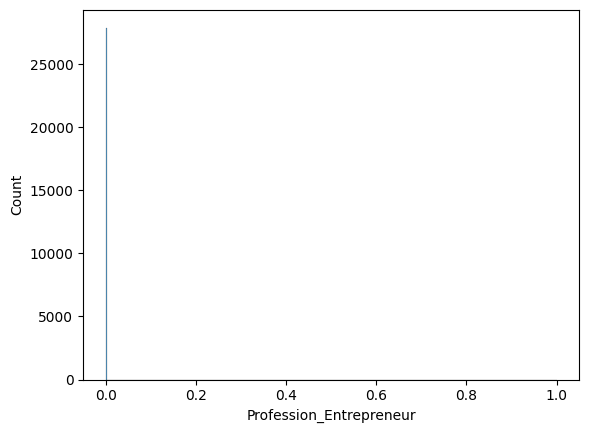

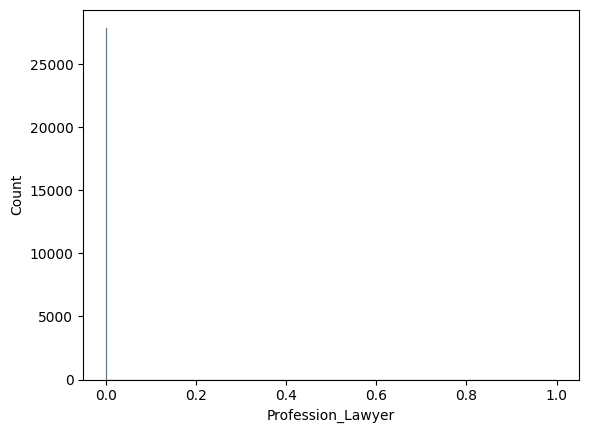

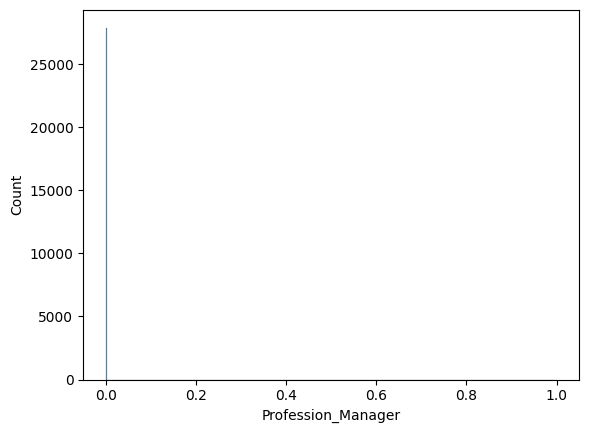

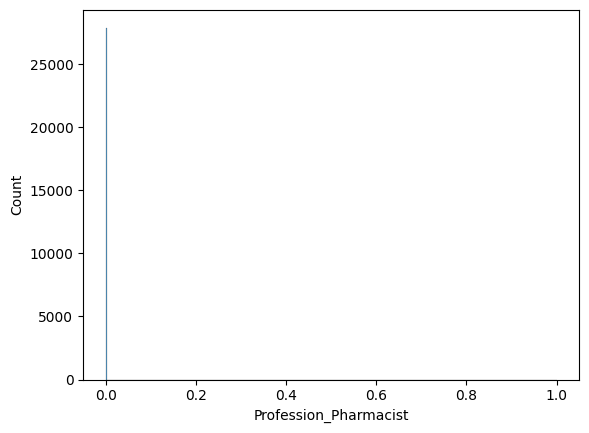

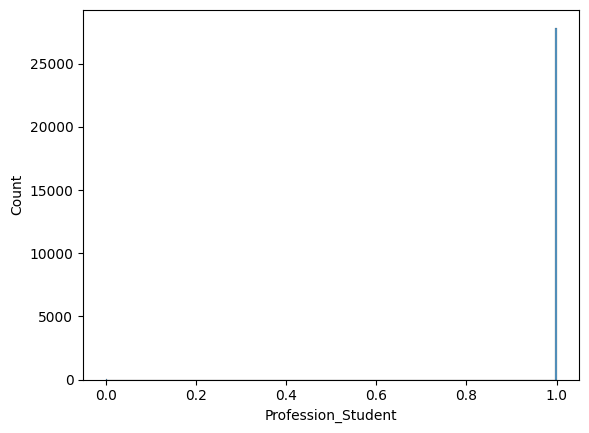

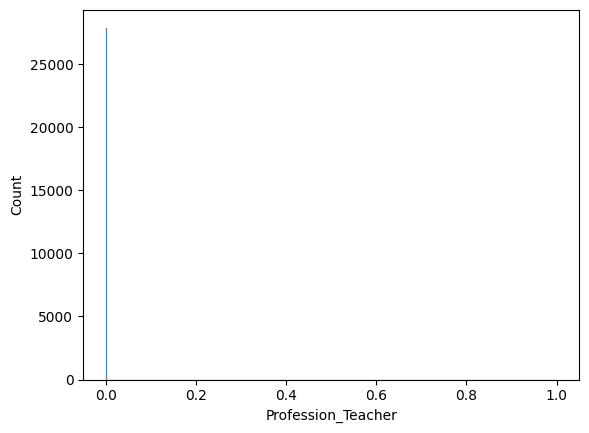

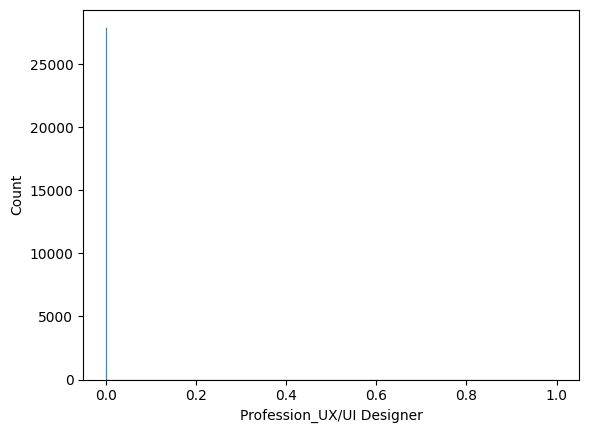

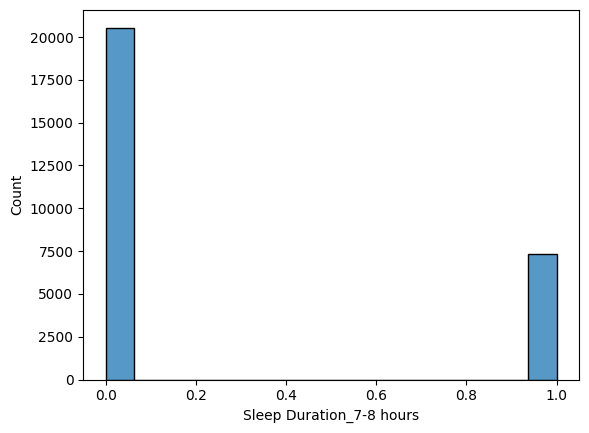

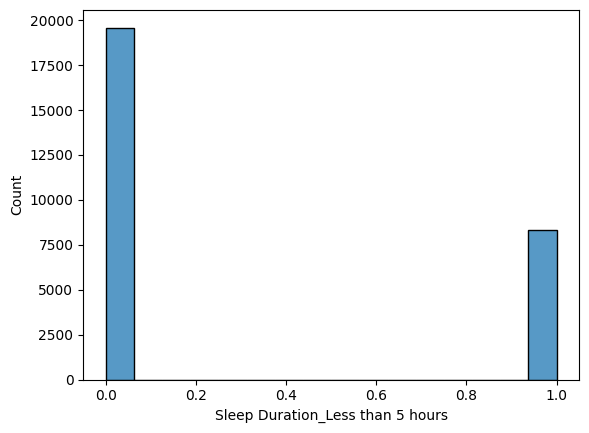

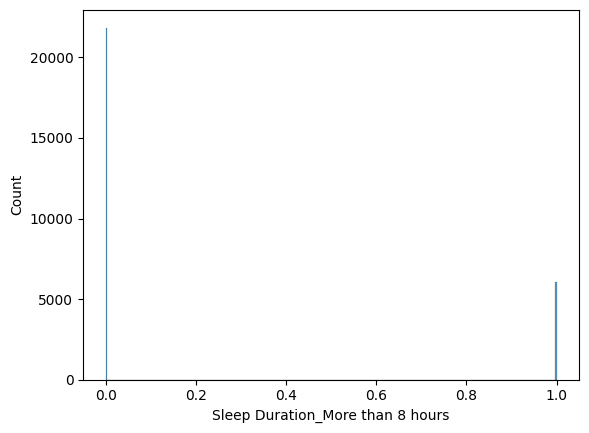

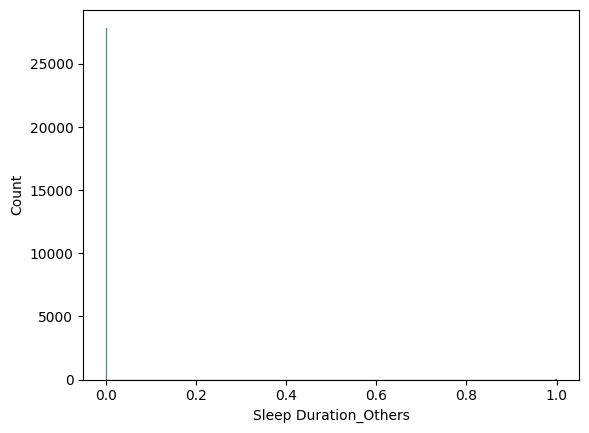

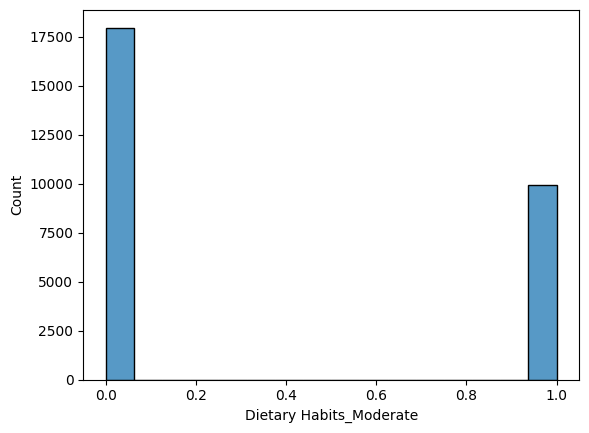

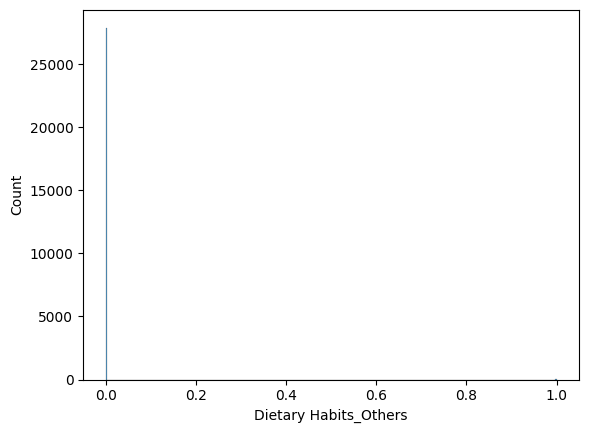

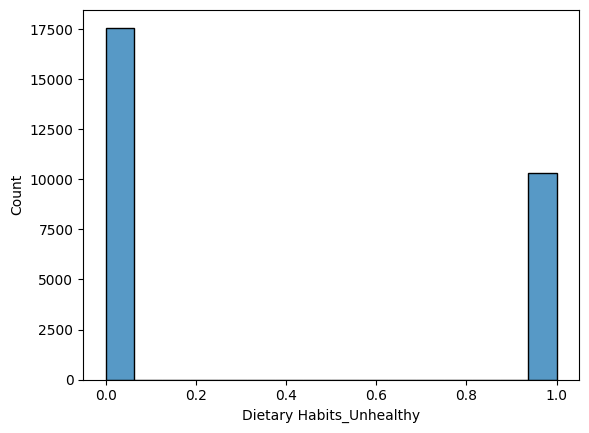

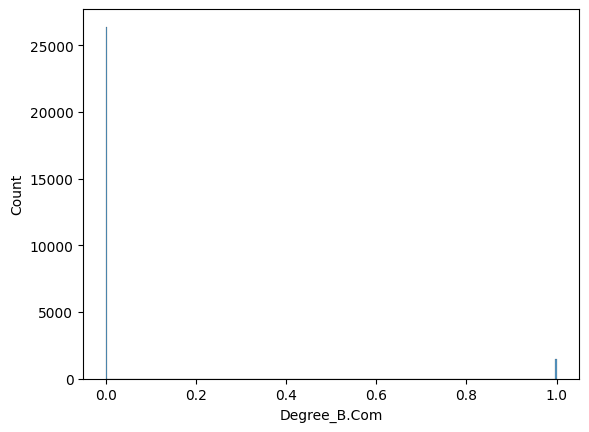

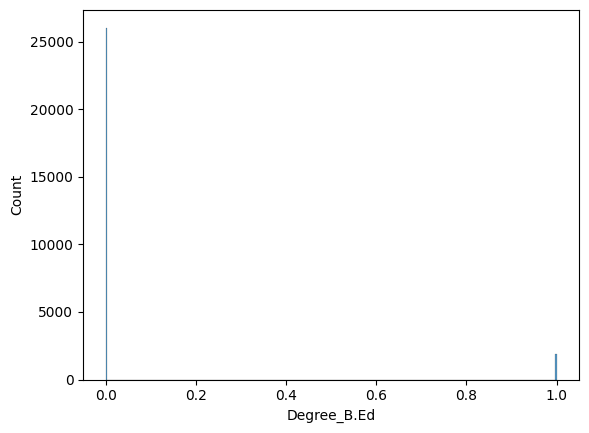

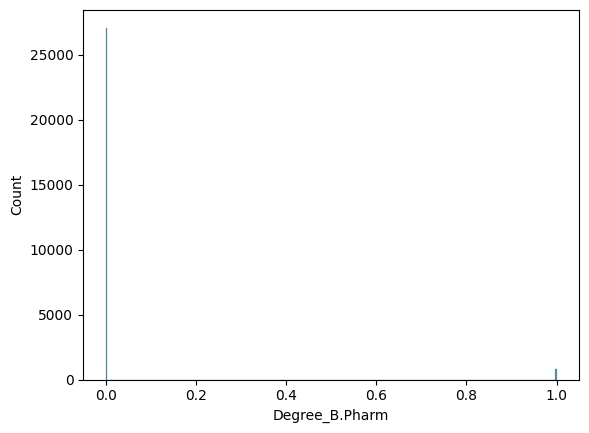

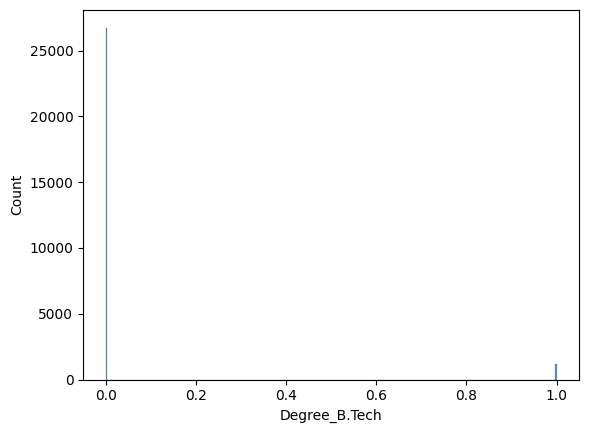

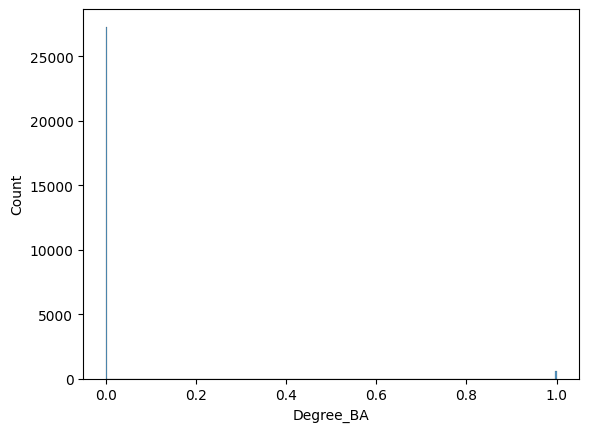

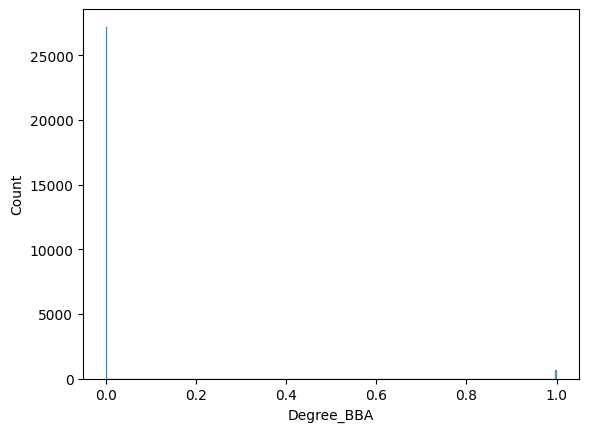

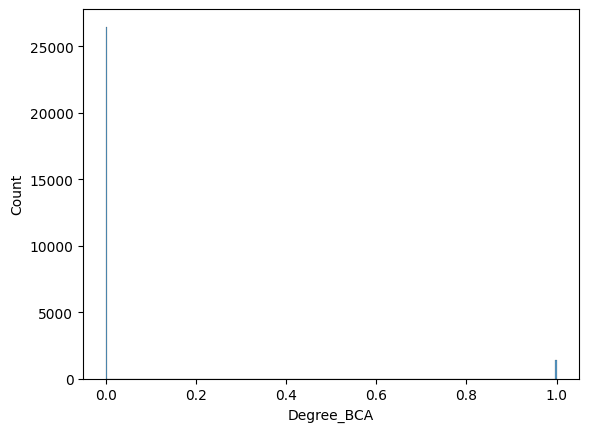

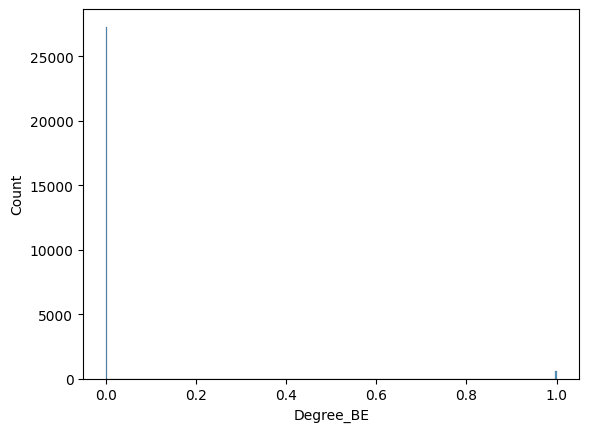

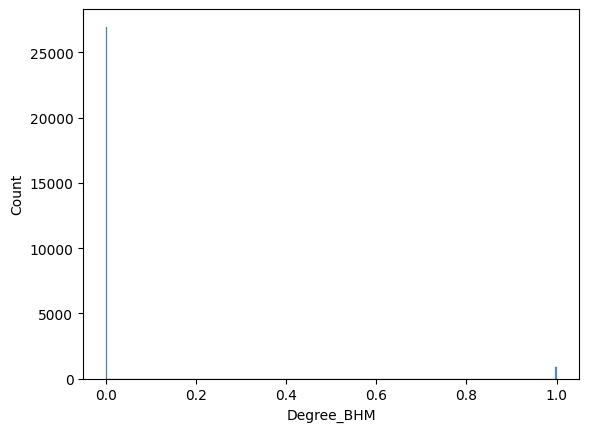

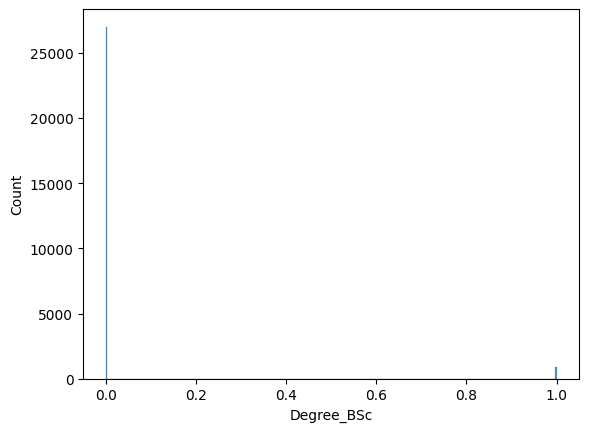

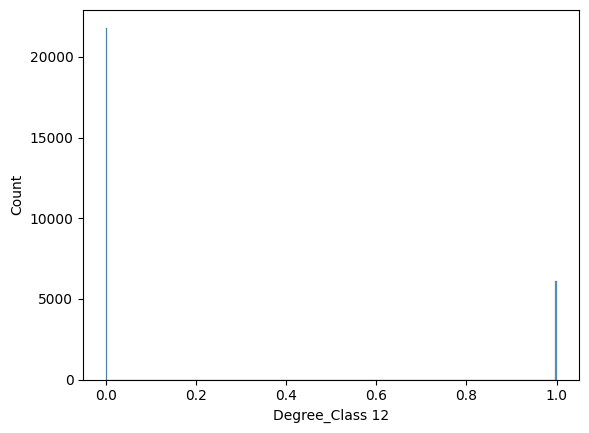

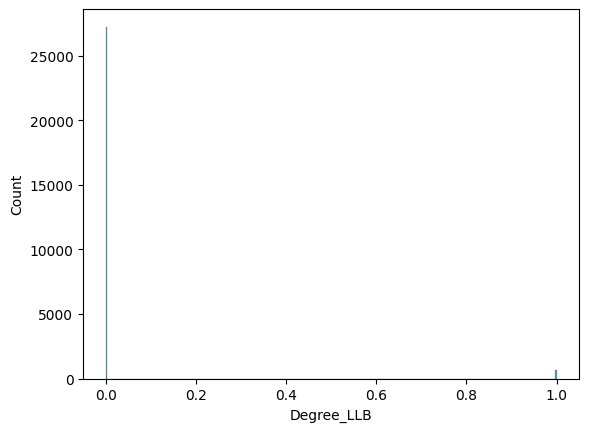

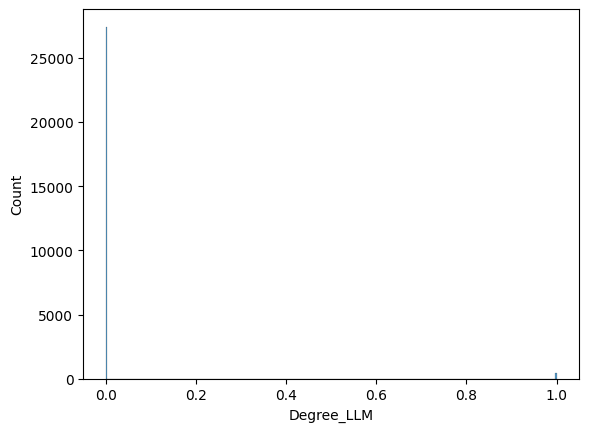

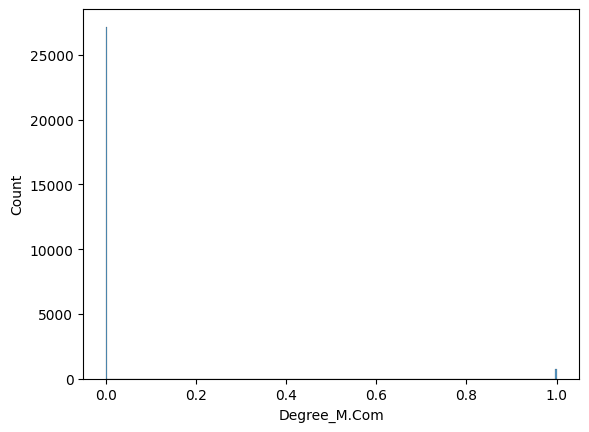

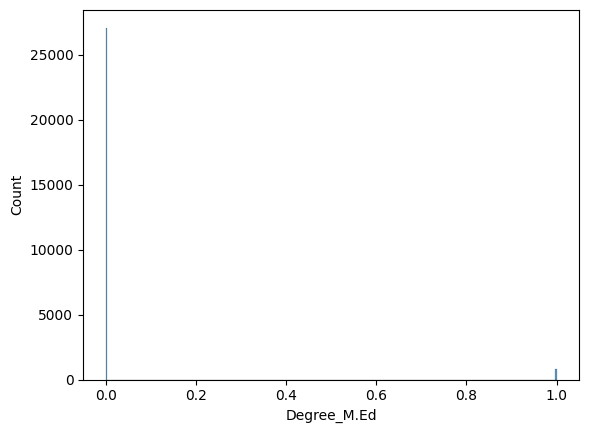

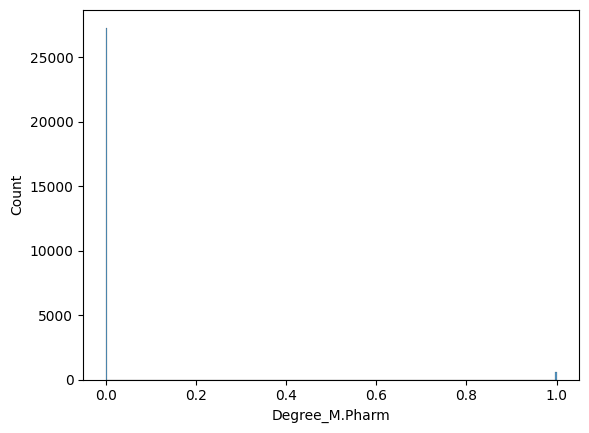

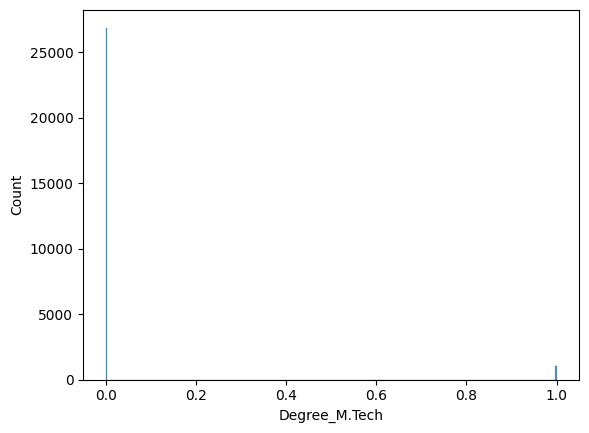

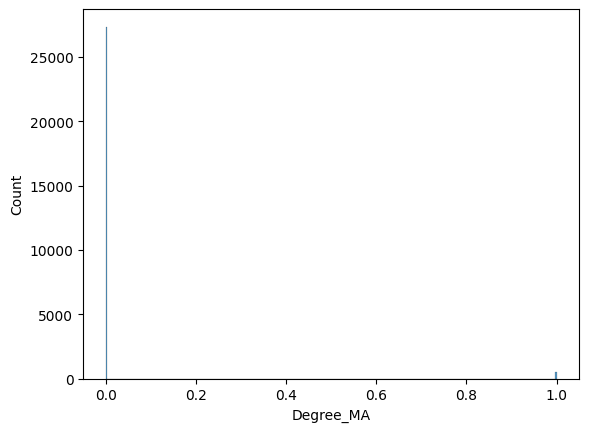

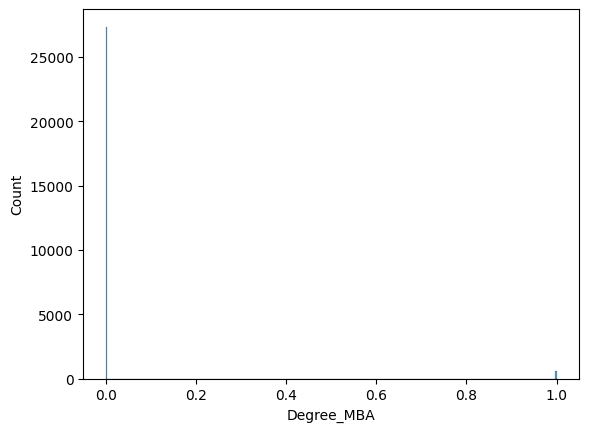

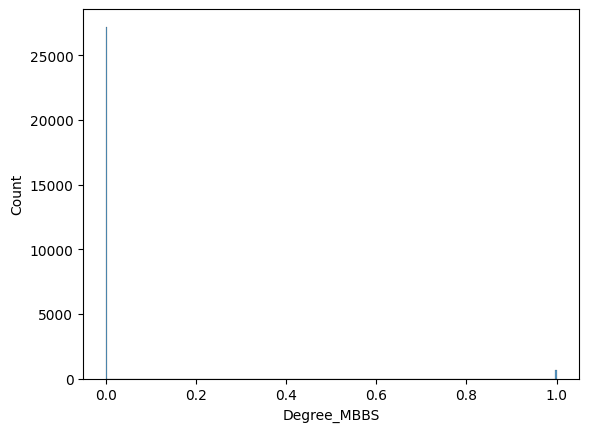

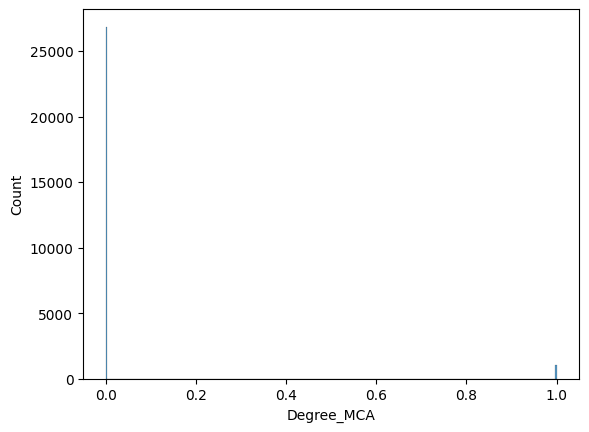

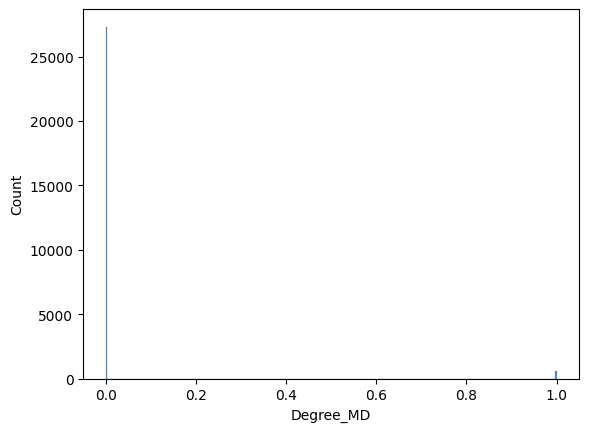

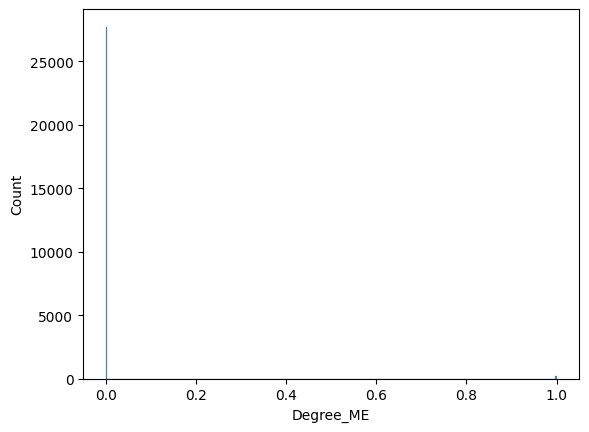

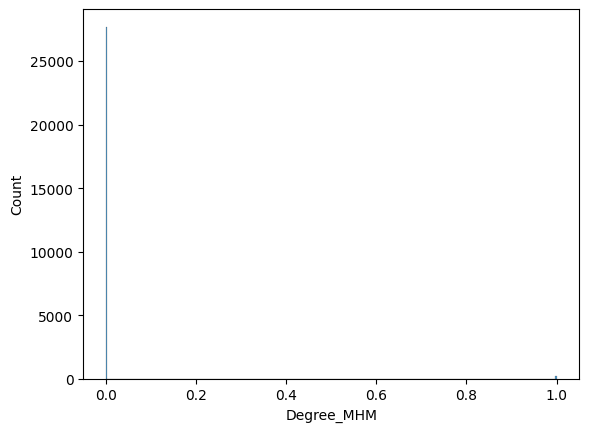

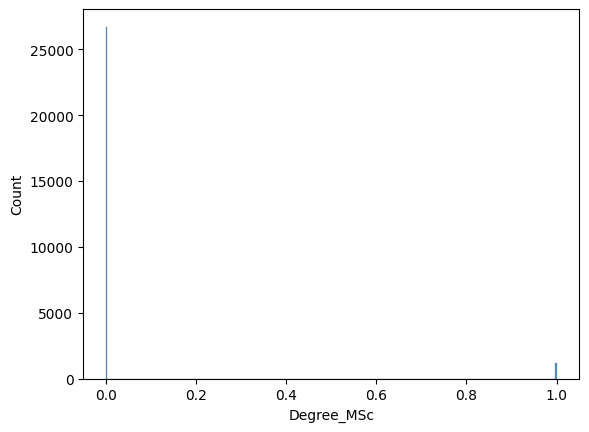

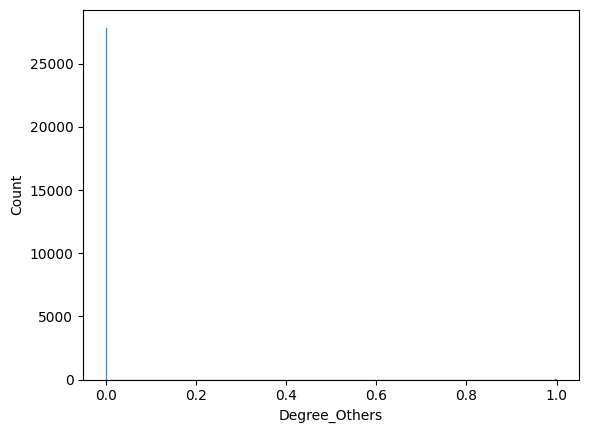

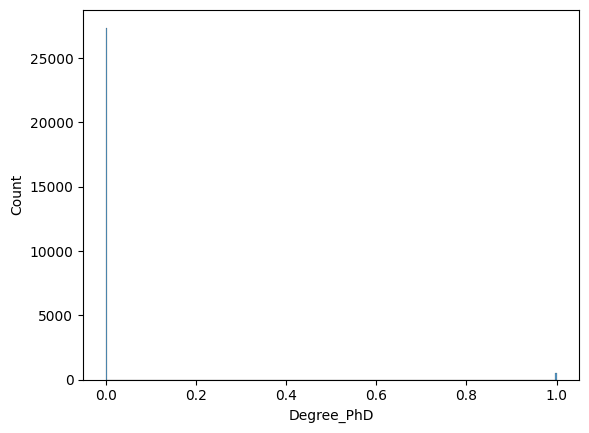

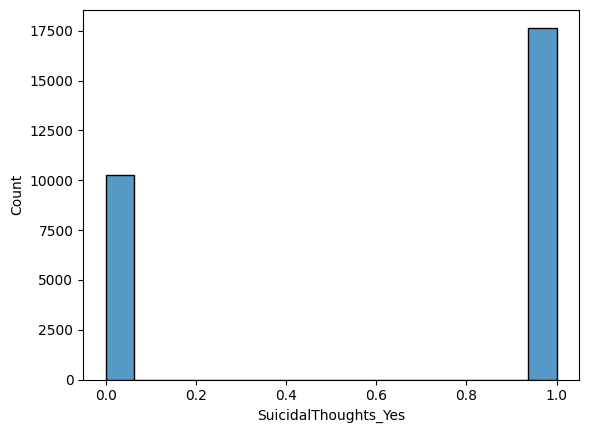

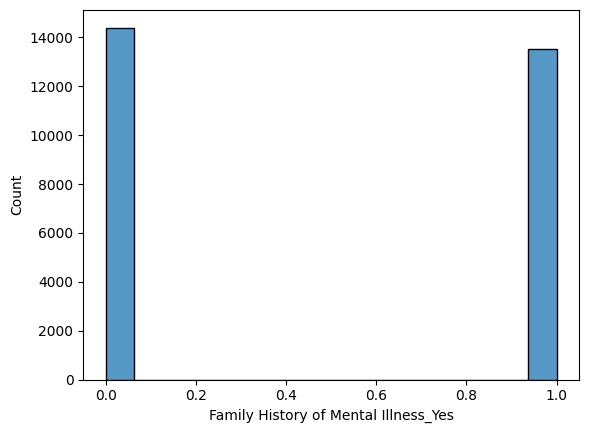

In [5]:
for col in df_numeric.columns:
    sns.histplot(data=df_numeric, x=col)
    plt.show()

In [6]:
categorical_columns = [
    'Gender',
    'City',
    'Profession',
    'Sleep Duration',
    'Dietary Habits',
    'Degree',
    'SuicidalThoughts',
    'Family History of Mental Illness'
]

numeric_columns = [
    'Age',
    'Academic Pressure',
    'Work Pressure',
    'CGPA',
    'Study Satisfaction',
    'Job Satisfaction',
    'Work/Study Hours',
    'Financial Stress',
]

target_var = ['Depression']


<Axes: >

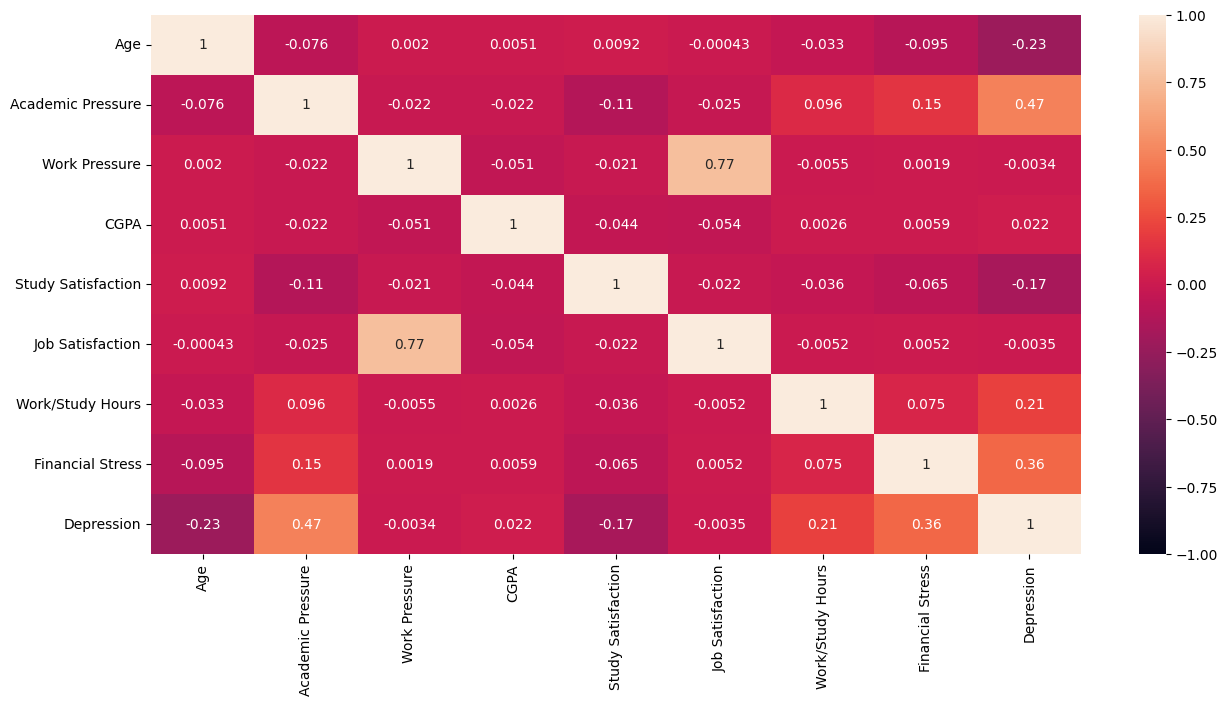

In [7]:
plt.figure(figsize=(15, 7))
sns.heatmap(df[numeric_columns + target_var].corr(), vmin=-1, vmax=1, annot=True)

<Figure size 1500x700 with 0 Axes>

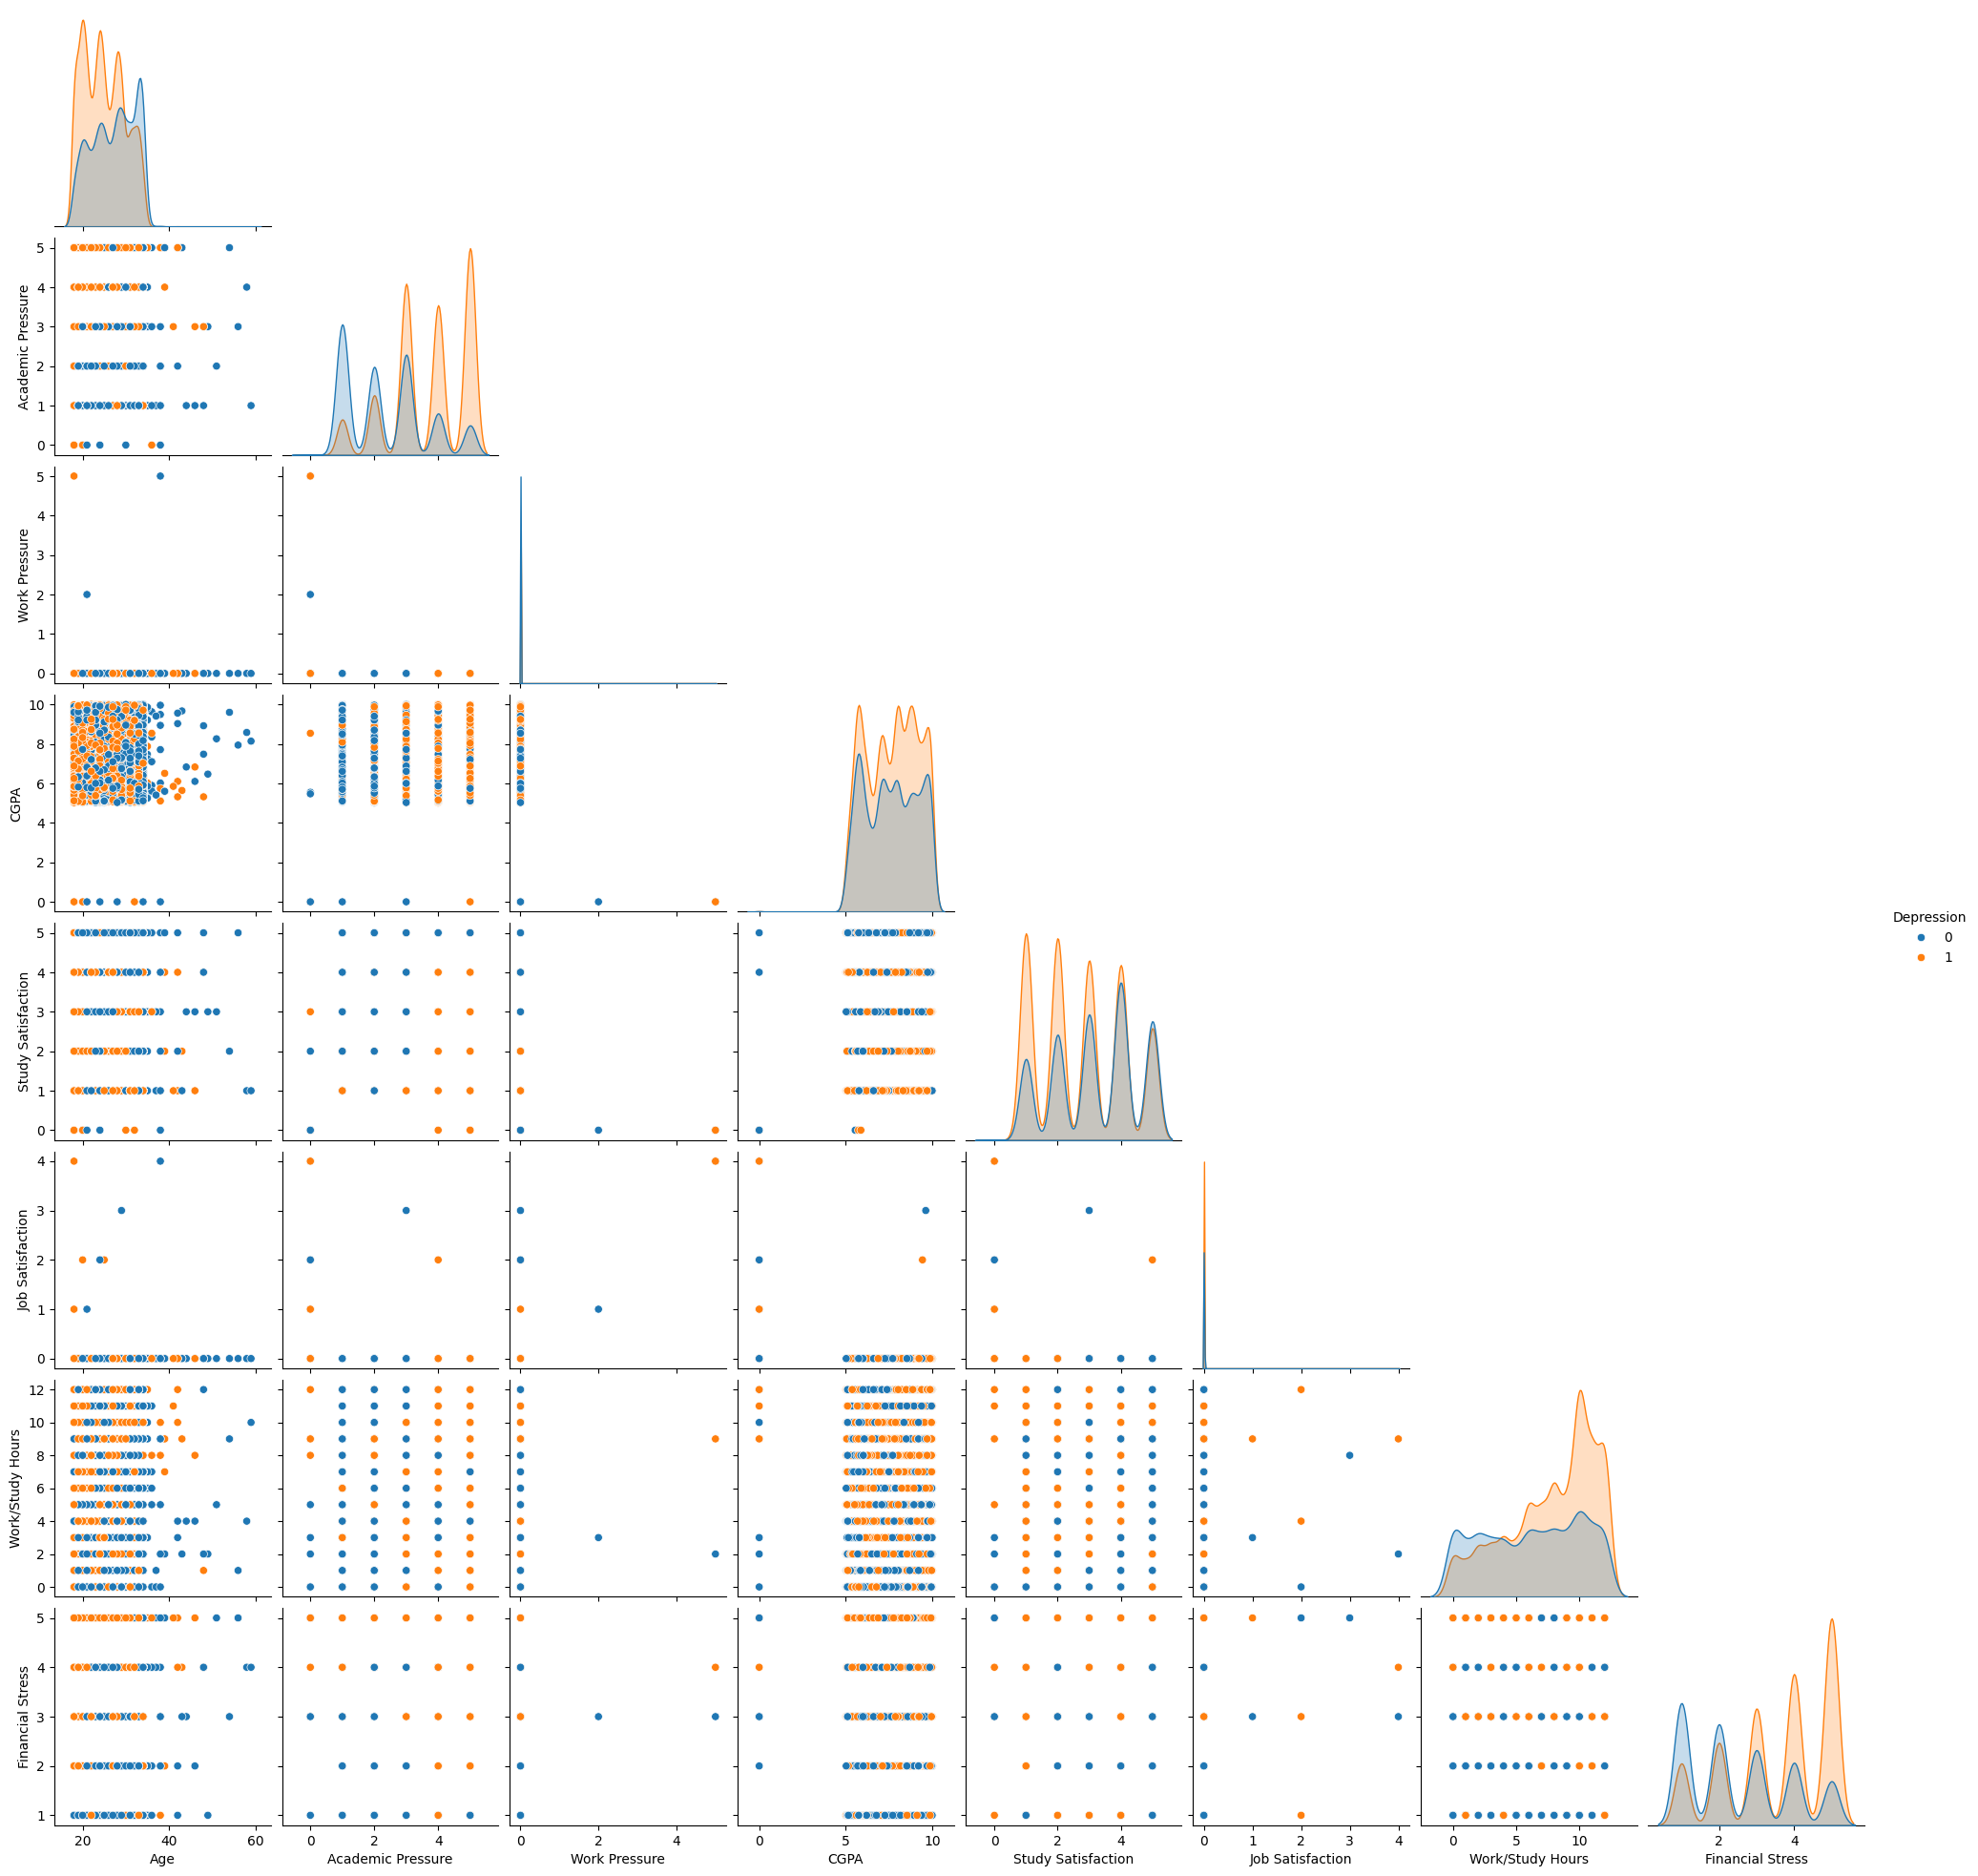

In [8]:
plt.figure(figsize=(15, 7))
sns.pairplot(df[numeric_columns + target_var], hue=target_var[0], corner=True)

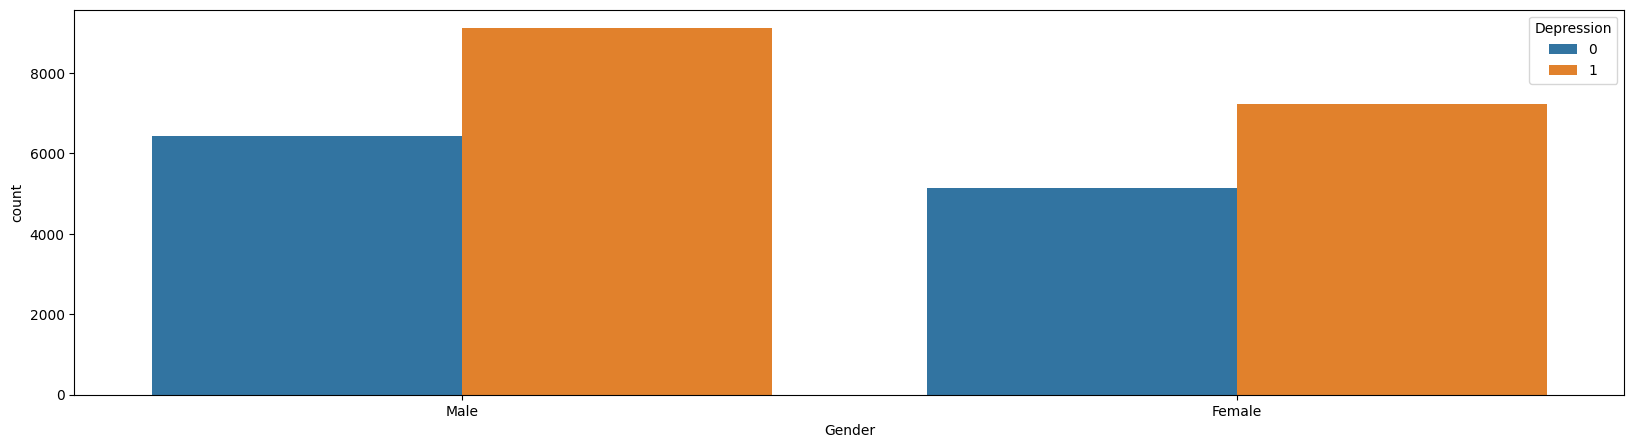

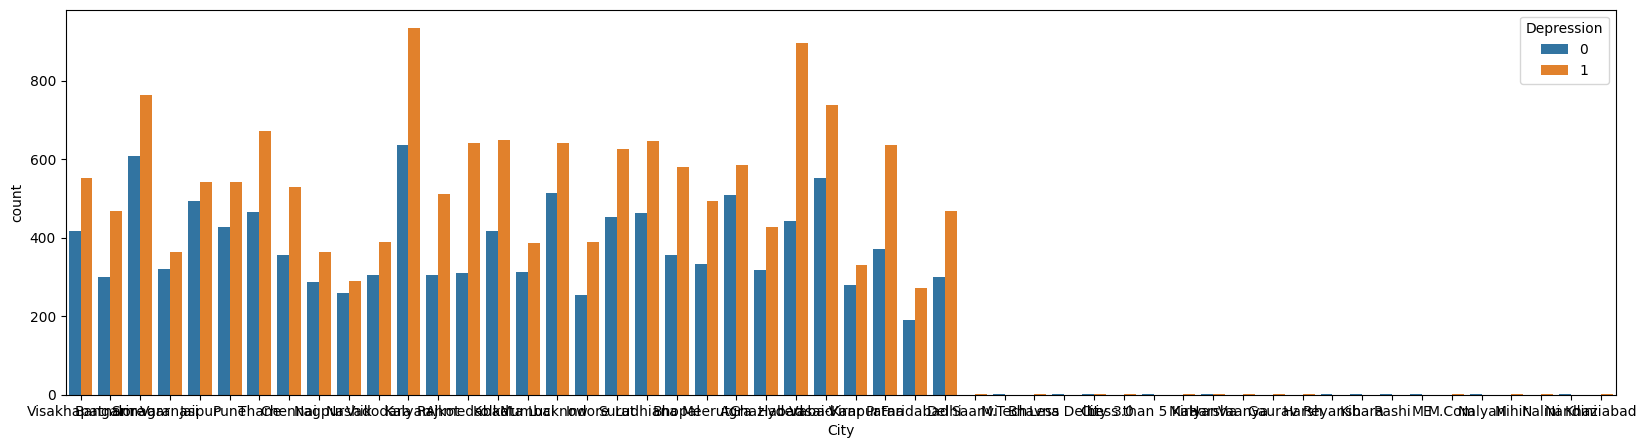

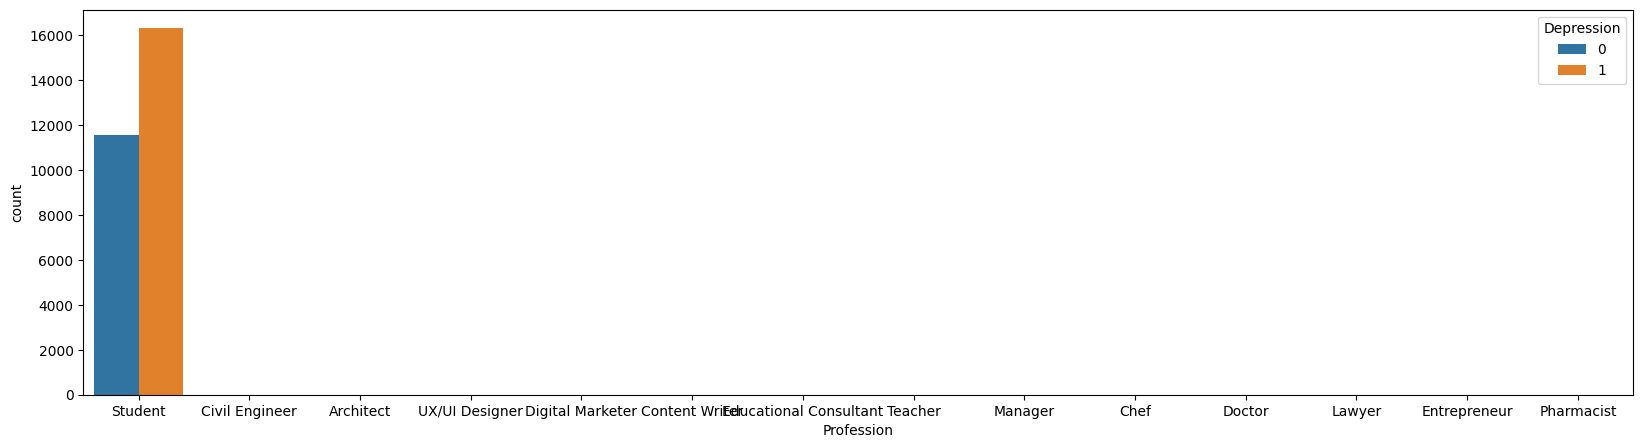

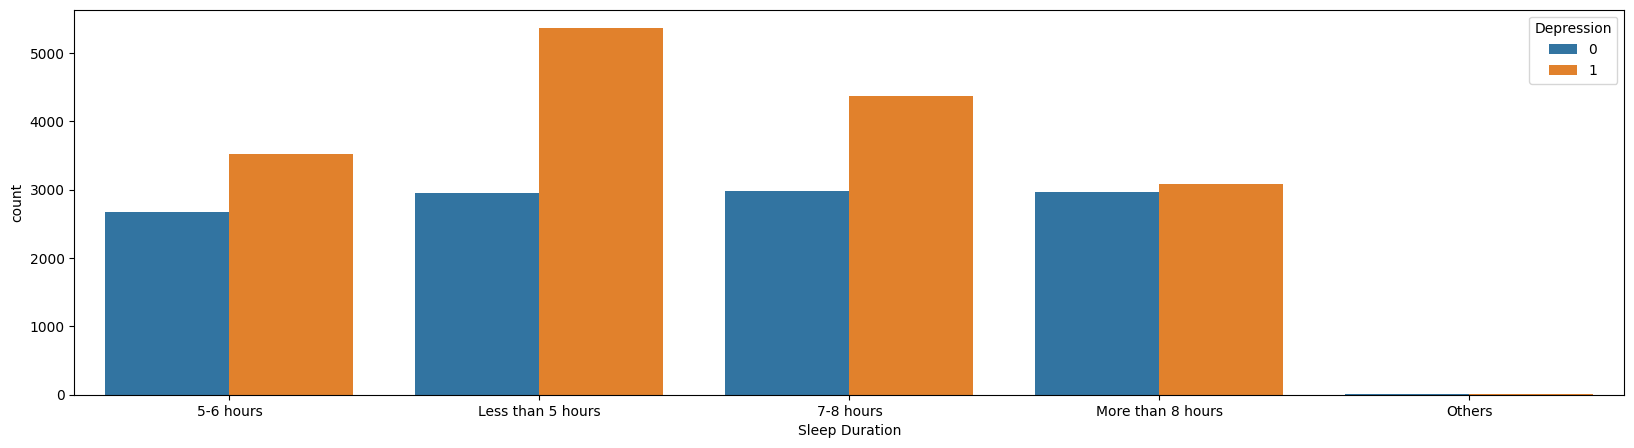

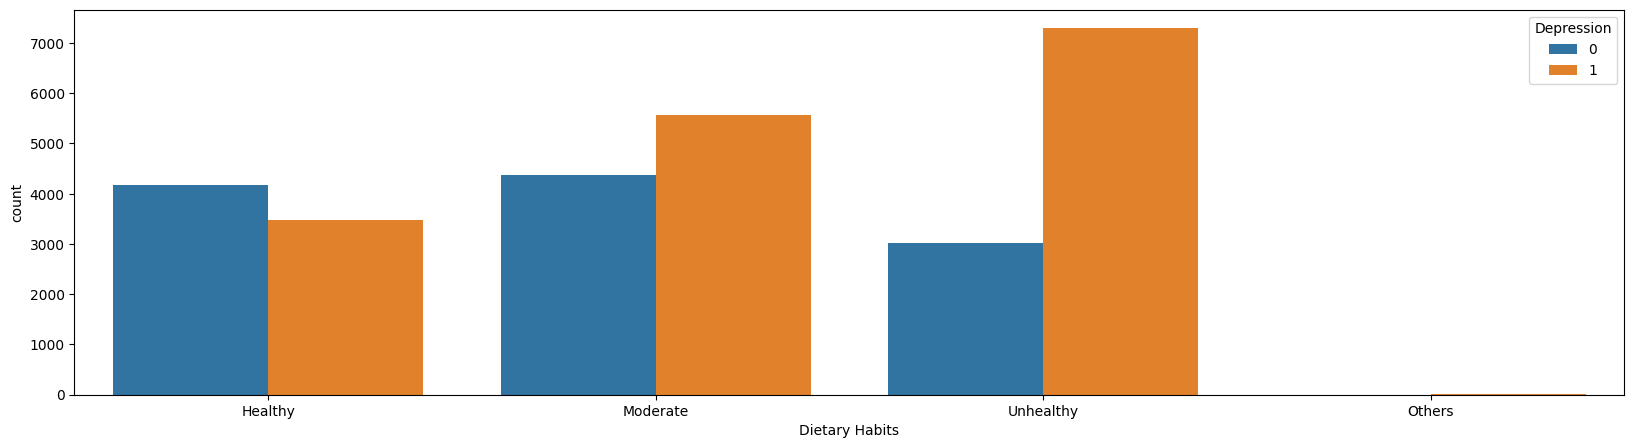

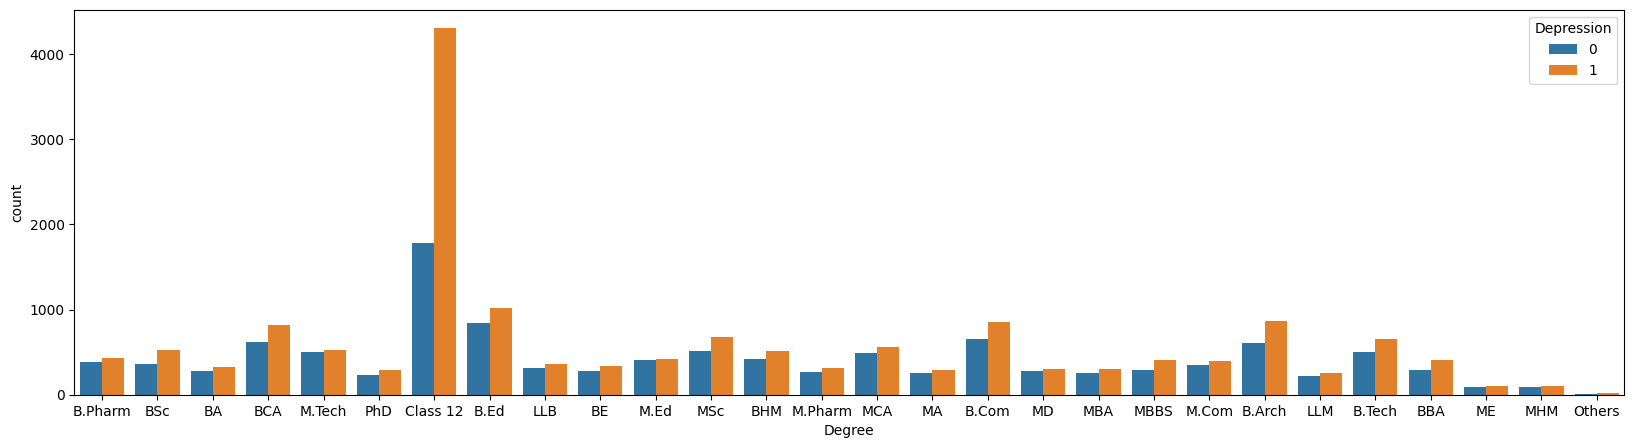

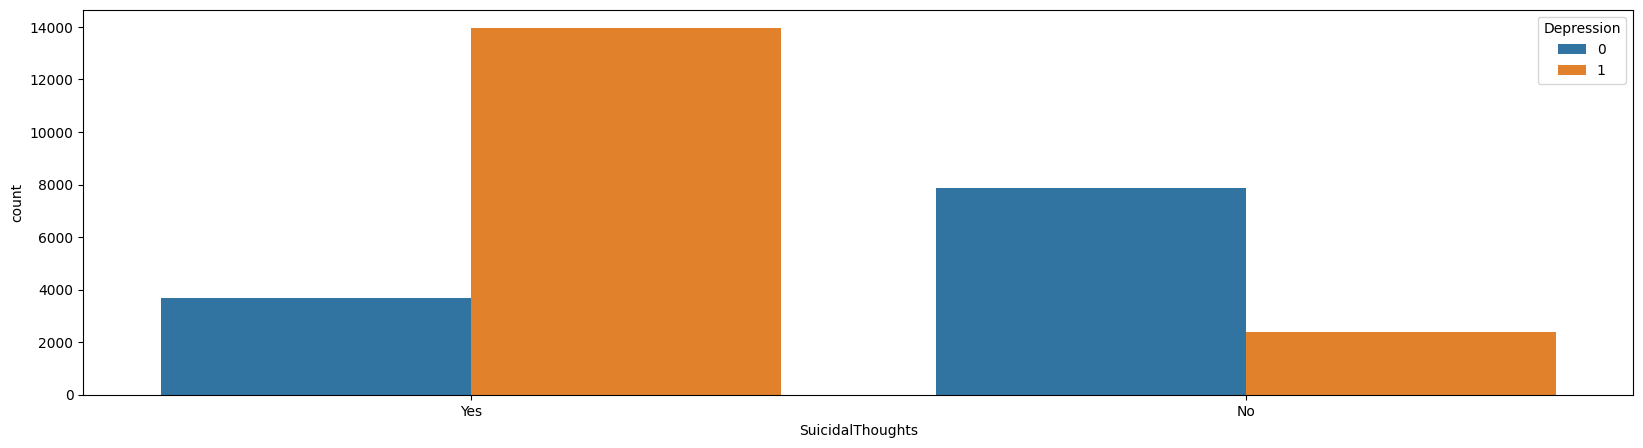

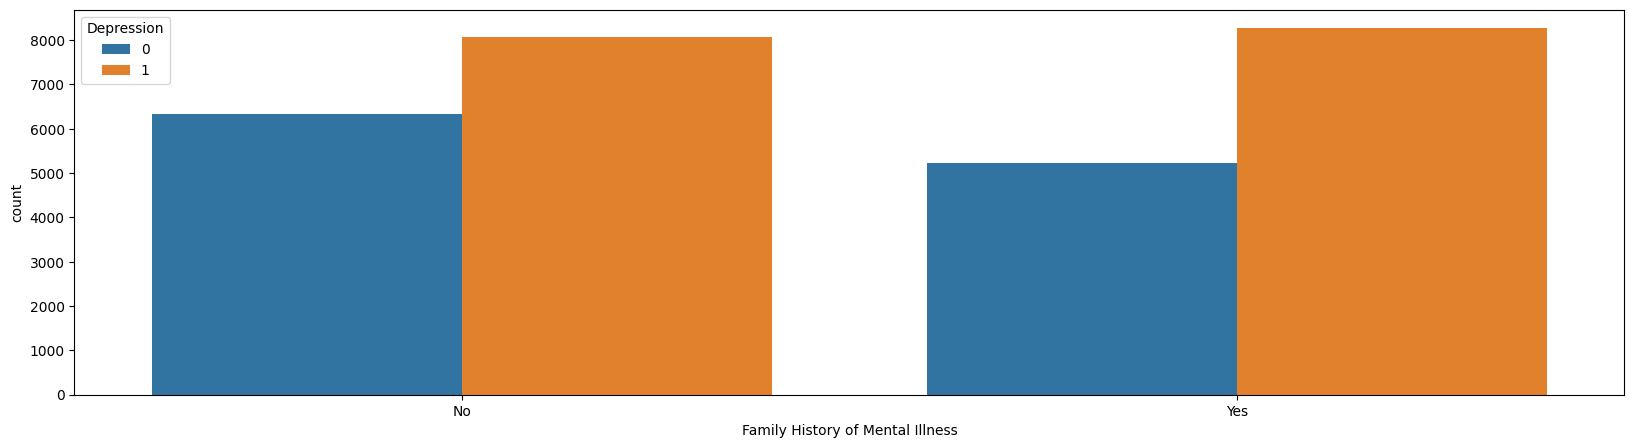

In [9]:
for col in categorical_columns:
    plt.figure(figsize=(20, 5))
    sns.countplot(data=df, x=col, hue='Depression')

In [10]:
interp_id = 0

# KNN

In [11]:
masks = ['Profession', 'Degree', 'id']
cols_to_drop = []

for m in masks:
    cols_to_drop.extend(df_numeric.filter(like=m).columns)

X = df_numeric.drop(columns=target_var + list(cols_to_drop))
y = df_numeric[target_var[0]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = KNeighborsClassifier(n_neighbors=100)
model.fit(X_train_scaled, y_train)

y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)

f1_train, f1_test

(0.832628763695971, 0.8342032011134307)

In [12]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.80      0.66      0.72      3799
           1       0.79      0.89      0.83      5408

    accuracy                           0.79      9207
   macro avg       0.80      0.77      0.78      9207
weighted avg       0.79      0.79      0.79      9207



In [13]:
model.predict(X_test_scaled[[interp_id]])

array([1])

In [14]:
indecies = model.kneighbors(X_test_scaled[[interp_id]])[1][0]
X_train.iloc[indecies]

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,city_population,city_is_other,Male_Male,Sleep Duration_7-8 hours,Sleep Duration_Less than 5 hours,Sleep Duration_More than 8 hours,Sleep Duration_Others,Dietary Habits_Moderate,Dietary Habits_Others,Dietary Habits_Unhealthy,Family History of Mental Illness_Yes
24694,25.0,4.0,0.0,6.00,1.0,0.0,1.0,5.0,3100000.0,0,False,False,False,True,False,True,False,False,False
17825,23.0,5.0,0.0,5.32,1.0,0.0,4.0,5.0,7100000.0,0,False,False,False,True,False,True,False,False,False
26360,24.0,5.0,0.0,5.41,1.0,0.0,2.0,4.0,1200000.0,0,False,False,False,True,False,True,False,False,False
1053,18.0,5.0,0.0,6.25,2.0,0.0,4.0,4.0,4500000.0,0,False,False,False,True,False,True,False,False,False
972,20.0,5.0,0.0,7.09,1.0,0.0,6.0,5.0,2000000.0,0,False,False,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23709,24.0,4.0,0.0,7.13,3.0,0.0,6.0,5.0,6800000.0,0,False,False,False,True,False,True,False,False,True
894,21.0,3.0,0.0,5.12,1.0,0.0,11.0,3.0,7100000.0,0,False,False,False,True,False,True,False,False,False
8335,32.0,3.0,0.0,6.50,2.0,0.0,10.0,4.0,3100000.0,0,False,False,False,True,False,True,False,False,False
11641,20.0,2.0,0.0,5.91,4.0,0.0,4.0,4.0,5600000.0,0,False,False,False,True,False,True,False,False,False


<Axes: xlabel='Depression', ylabel='Count'>

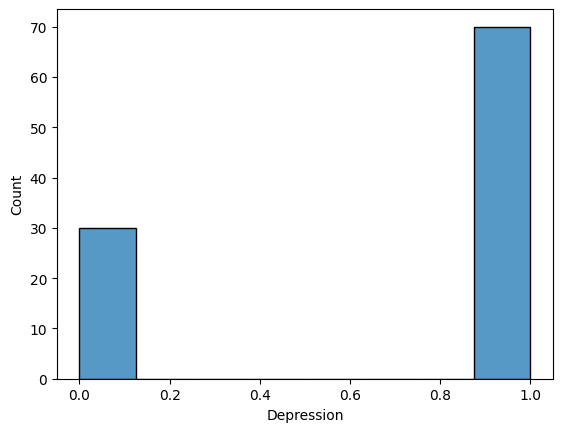

In [15]:
neighbors_target = y_train.iloc[indecies]
sns.histplot(neighbors_target)

In [16]:
X_train.columns

Index(['Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
       'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours',
       'Financial Stress', 'city_population', 'city_is_other', 'Male_Male',
       'Sleep Duration_7-8 hours', 'Sleep Duration_Less than 5 hours',
       'Sleep Duration_More than 8 hours', 'Sleep Duration_Others',
       'Dietary Habits_Moderate', 'Dietary Habits_Others',
       'Dietary Habits_Unhealthy', 'Family History of Mental Illness_Yes'],
      dtype='object')

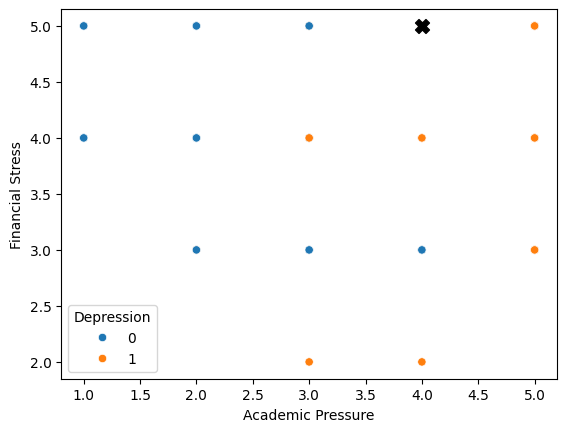

In [17]:
sns.scatterplot(
    data=X_train.iloc[indecies],
    x='Academic Pressure',
    y='Financial Stress',
    hue=y_train.iloc[indecies],
)
plt.scatter(
    X_test.iloc[interp_id]['Academic Pressure'],
    X_test.iloc[interp_id]['Financial Stress'],
    color='black', marker='X', s=100, label='Current Point'
)

# Naive Bayes

In [18]:
masks = ['Profession', 'Degree', 'id']
cols_to_drop = []
for m in masks:
    cols_to_drop.extend(df_numeric.filter(like=m).columns)

X = df_numeric.drop(columns=target_var + list(cols_to_drop))
y = df_numeric[target_var[0]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

model = GaussianNB()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)

f1_train, f1_test


(0.7378621108785198, 0.7400615805679097)

In [19]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3799
           1       0.59      1.00      0.74      5408

    accuracy                           0.59      9207
   macro avg       0.29      0.50      0.37      9207
weighted avg       0.35      0.59      0.43      9207



/home/vitamin20021312/IT/lazy-fca-learning/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/vitamin20021312/IT/lazy-fca-learning/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/vitamin20021312/IT/lazy-fca-learning/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


In [20]:
model.predict_proba(X_test.iloc[[interp_id]])

array([[0.41416334, 0.58583666]])

In [21]:
pd.DataFrame(model.theta_, columns=X_train.columns, index=model.classes_)

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,city_population,city_is_other,Male_Male,Sleep Duration_7-8 hours,Sleep Duration_Less than 5 hours,Sleep Duration_More than 8 hours,Sleep Duration_Others,Dietary Habits_Moderate,Dietary Habits_Others,Dietary Habits_Unhealthy,Family History of Mental Illness_Yes
0,27.122360,2.361540,0.000902,7.613927,3.210330,0.000644,6.226172,2.513910,3.403658e+06,0.000902,0.553838,0.260304,0.254122,0.258243,0.000773,0.376095,0.000258,0.264554,0.452087
1,24.859065,3.693145,0.000458,7.693666,2.745859,0.000549,7.819072,3.582136,3.534923e+06,0.000641,0.555779,0.270523,0.328269,0.191452,0.000549,0.342821,0.000549,0.443214,0.508099


In [22]:
X_test.iloc[interp_id] - model.theta_[0]

Age                                           -3.12236
Academic Pressure                              1.63846
Work Pressure                                -0.000902
CGPA                                         -1.933927
Study Satisfaction                            -2.21033
Job Satisfaction                             -0.000644
Work/Study Hours                             -3.226172
Financial Stress                               2.48609
city_population                         1096342.091705
city_is_other                                -0.000902
Male_Male                                    -0.553838
Sleep Duration_7-8 hours                     -0.260304
Sleep Duration_Less than 5 hours             -0.254122
Sleep Duration_More than 8 hours              0.741757
Sleep Duration_Others                        -0.000773
Dietary Habits_Moderate                       0.623905
Dietary Habits_Others                        -0.000258
Dietary Habits_Unhealthy                     -0.264554
Family His

In [23]:

X_test.iloc[interp_id] - model.theta_[1]

Age                                         -0.859065
Academic Pressure                            0.306855
Work Pressure                               -0.000458
CGPA                                        -2.013666
Study Satisfaction                          -1.745859
Job Satisfaction                            -0.000549
Work/Study Hours                            -4.819072
Financial Stress                             1.417864
city_population                         965077.331381
city_is_other                               -0.000641
Male_Male                                   -0.555779
Sleep Duration_7-8 hours                    -0.270523
Sleep Duration_Less than 5 hours            -0.328269
Sleep Duration_More than 8 hours             0.808548
Sleep Duration_Others                       -0.000549
Dietary Habits_Moderate                      0.657179
Dietary Habits_Others                       -0.000549
Dietary Habits_Unhealthy                    -0.443214
Family History of Mental Ill

# Logistic regression

In [24]:
masks = ['Profession', 'Degree', 'id']
cols_to_drop = []
for m in masks:
    cols_to_drop.extend(df_numeric.filter(like=m).columns)

X = df_numeric.drop(columns=target_var + list(cols_to_drop))
y = df_numeric[target_var[0]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)

f1_train, f1_test

(0.83082723641097, 0.8351608518350703)

In [25]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.78      0.73      0.75      3799
           1       0.82      0.85      0.84      5408

    accuracy                           0.80      9207
   macro avg       0.80      0.79      0.79      9207
weighted avg       0.80      0.80      0.80      9207



In [26]:
model.predict_proba(X_test_scaled[[interp_id]])

array([[0.14255372, 0.85744628]])

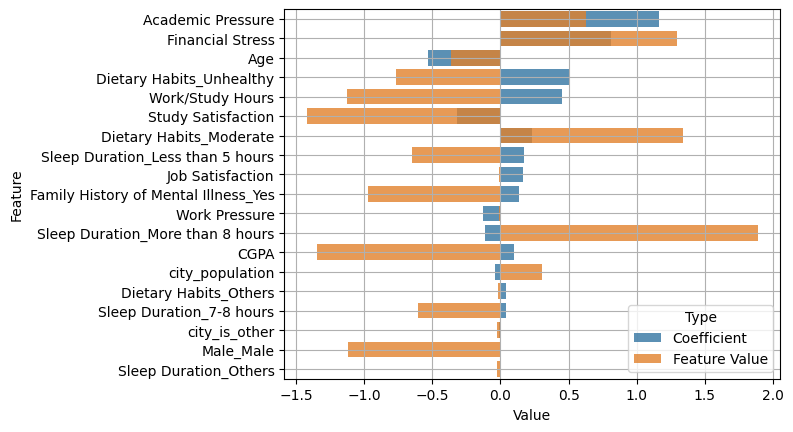

In [27]:
coefs = pd.Series(model.coef_[0], index=X_train.columns)
values = pd.Series(X_test_scaled[interp_id], index=X_train.columns)

order = coefs.abs().sort_values(ascending=False).index
coefs_sorted = coefs[order]
values_sorted = values[order]

df_plot = pd.DataFrame({
    'Feature': order,
    'Coefficient': coefs_sorted.values,
    'Feature Value': values_sorted.values
}).melt(id_vars='Feature', var_name='Type', value_name='Value')

sns.barplot(
    data=df_plot,
    y='Feature',
    x='Value',
    hue='Type',
    dodge=False,
    alpha=0.8
)
plt.grid()

# SVM

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import f1_score

masks = ['id']
cols_to_drop = []
for m in masks:
    cols_to_drop.extend(df_numeric.filter(like=m).columns)

X = df_numeric.drop(columns=target_var + list(cols_to_drop))
y = df_numeric[target_var[0]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = SVC(kernel='linear')
model.fit(X_train_scaled, y_train)

y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)

f1_train, f1_test


(0.8323766816143497, 0.8363044068410098)

In [29]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.78      0.73      0.75      3799
           1       0.82      0.85      0.84      5408

    accuracy                           0.80      9207
   macro avg       0.80      0.79      0.80      9207
weighted avg       0.80      0.80      0.80      9207



In [30]:
model.decision_function(X_test_scaled[[interp_id]])

array([1.36753353])

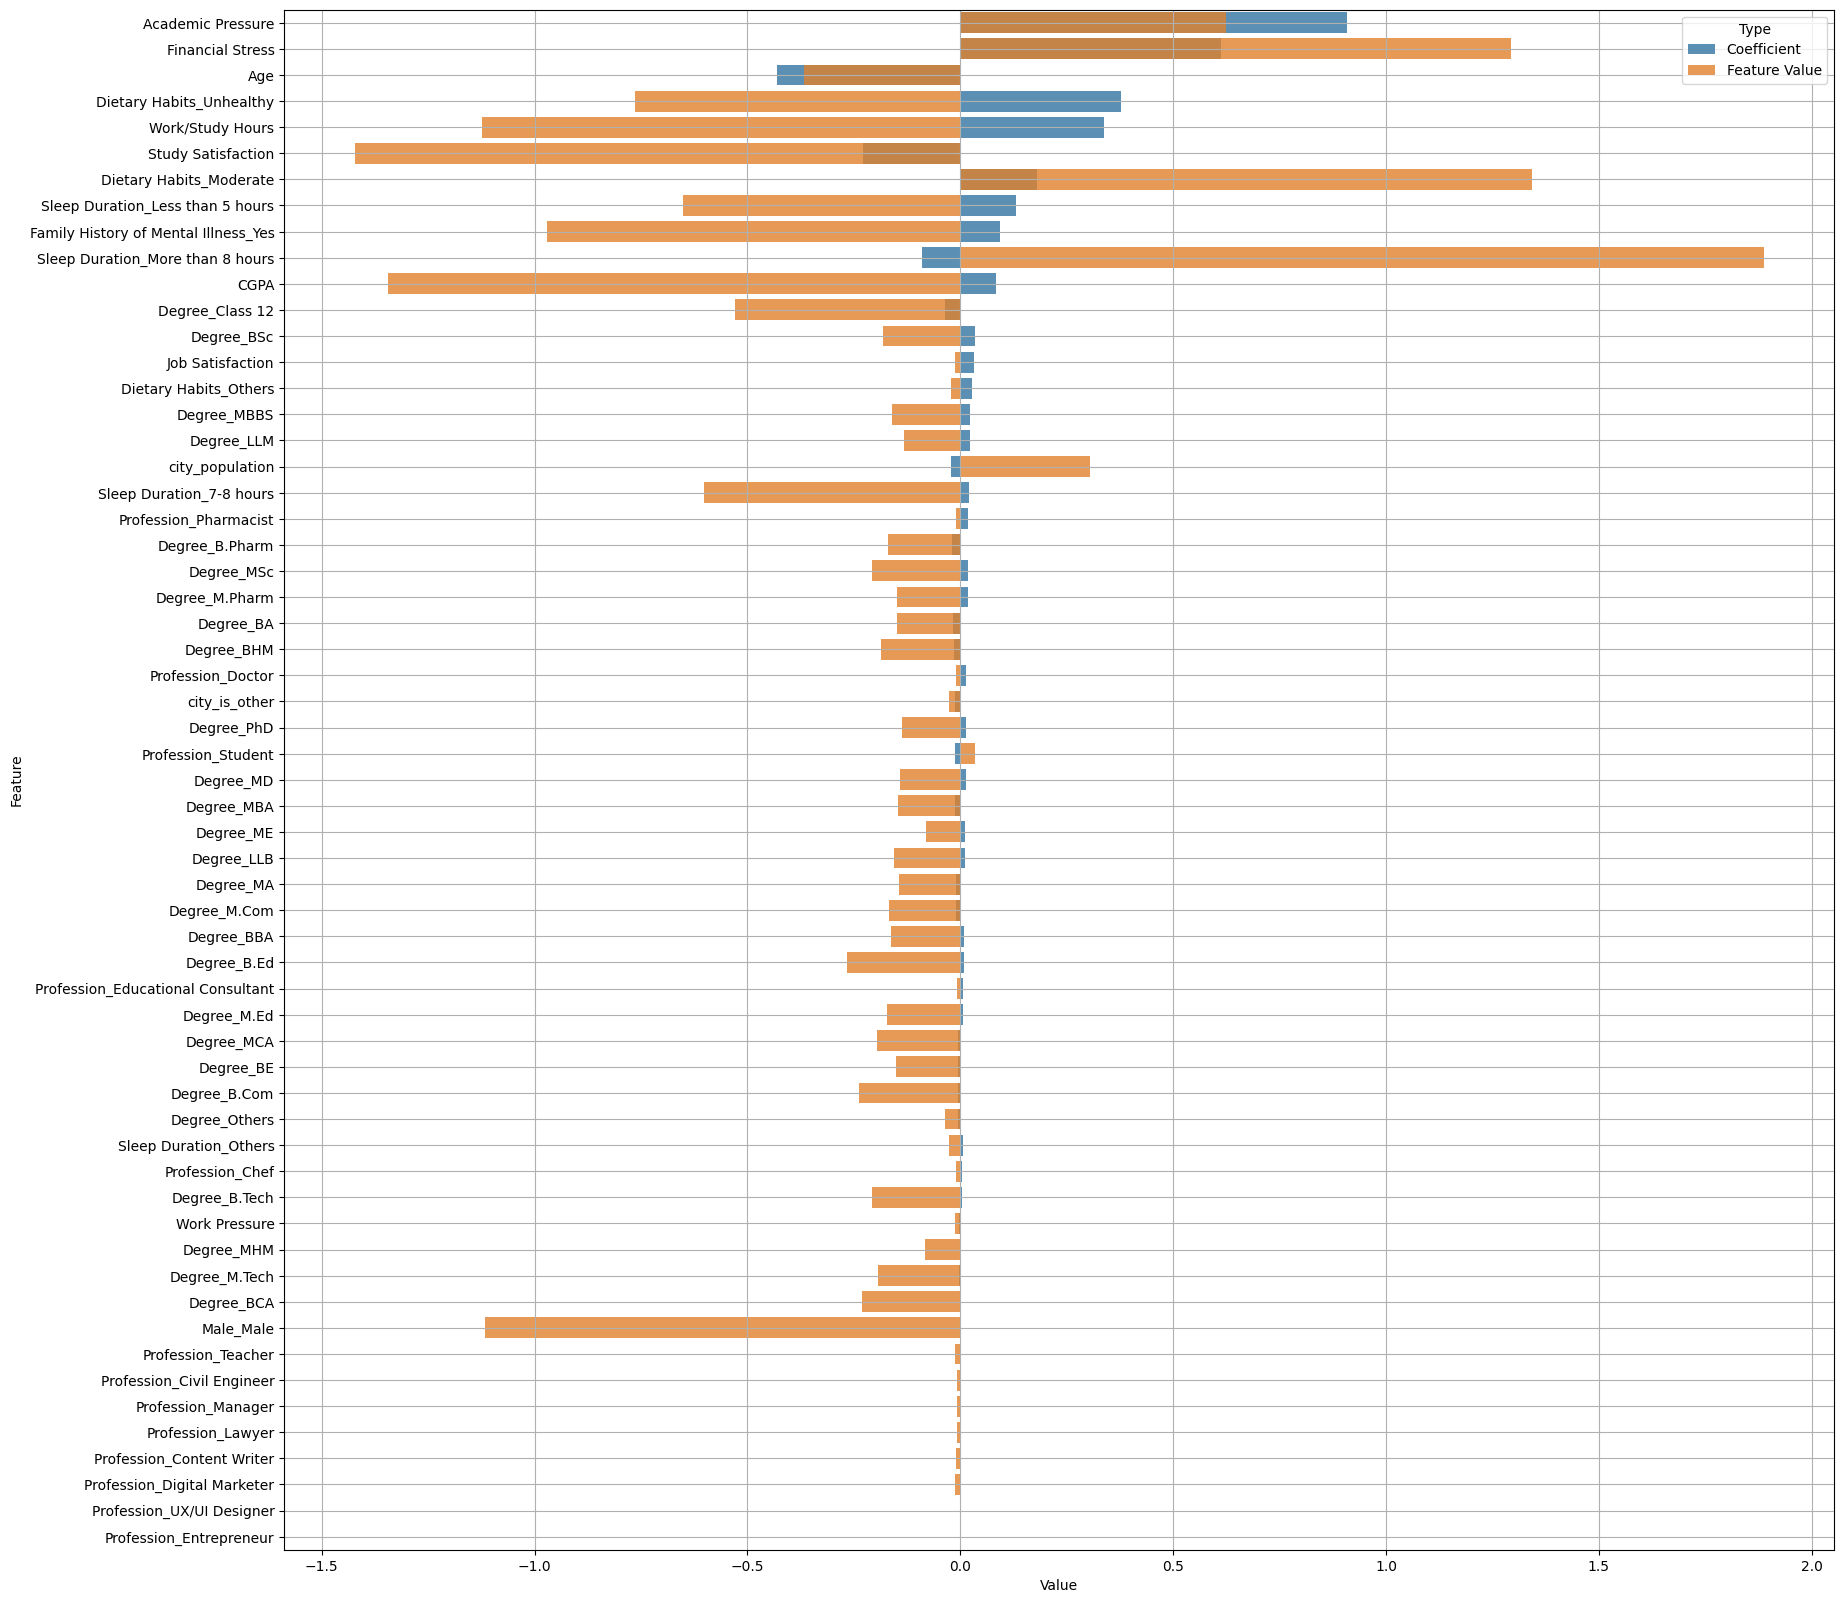

In [31]:
coefs = pd.Series(model.coef_[0], index=X_train.columns)
values = pd.Series(X_test_scaled[interp_id], index=X_train.columns)

order = coefs.abs().sort_values(ascending=False).index
coefs_sorted = coefs[order]
values_sorted = values[order]

df_plot = pd.DataFrame({
    'Feature': order,
    'Coefficient': coefs_sorted.values,
    'Feature Value': values_sorted.values
}).melt(id_vars='Feature', var_name='Type', value_name='Value')

plt.figure(figsize=(20, 20))
sns.barplot(
    data=df_plot,
    y='Feature',
    x='Value',
    hue='Type',
    dodge=False,
    alpha=0.8
)
plt.grid()

# Decision tree

In [32]:
masks = ['id']
cols_to_drop = []
for m in masks:
    cols_to_drop.extend(df.filter(like=m).columns)

X = pd.get_dummies(df.drop(columns=target_var + list(cols_to_drop)))
y = df[target_var[0]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

model = DecisionTreeClassifier(random_state=0, min_samples_leaf=15, max_depth=3)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)

f1_train, f1_test


(0.8050117462803446, 0.809326880774307)

In [33]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.75      0.64      0.69      3799
           1       0.77      0.85      0.81      5408

    accuracy                           0.76      9207
   macro avg       0.76      0.75      0.75      9207
weighted avg       0.76      0.76      0.76      9207



In [34]:
model.predict_proba(X_test.iloc[[interp_id]])

array([[0.11199395, 0.88800605]])

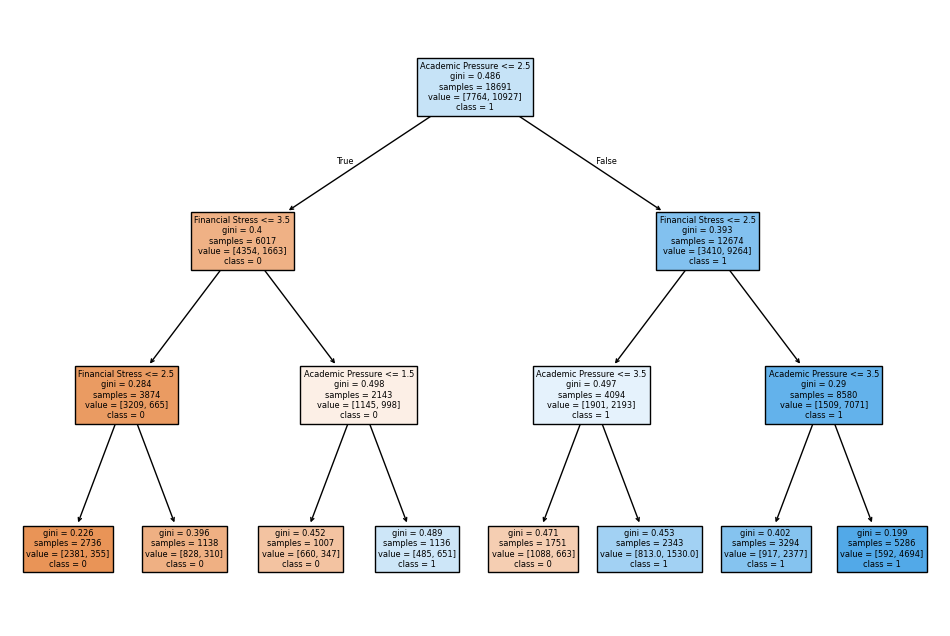

In [35]:
plt.figure(figsize=(12,8))
plot_tree(model, feature_names=X_train.columns, class_names=['0','1'], filled=True)
plt.show()

# Random forest

In [36]:
masks = ['id']
cols_to_drop = []
for m in masks:
    cols_to_drop.extend(df.filter(like=m).columns)

X = pd.get_dummies(df.drop(columns=target_var + list(cols_to_drop)))
y = df[target_var[0]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

model = RandomForestClassifier(
    n_estimators=3000,
    max_depth=15,
    min_samples_leaf=3,
    random_state=0
)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)

f1_train, f1_test


(0.8745397159389795, 0.8344955424132756)

In [37]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.79      0.69      0.74      3799
           1       0.80      0.87      0.83      5408

    accuracy                           0.80      9207
   macro avg       0.80      0.78      0.78      9207
weighted avg       0.80      0.80      0.79      9207



In [38]:
model.predict_proba(X_test.iloc[[interp_id]])

array([[0.22934589, 0.77065411]])

Text(0.5, 1.0, 'Feature Importance')

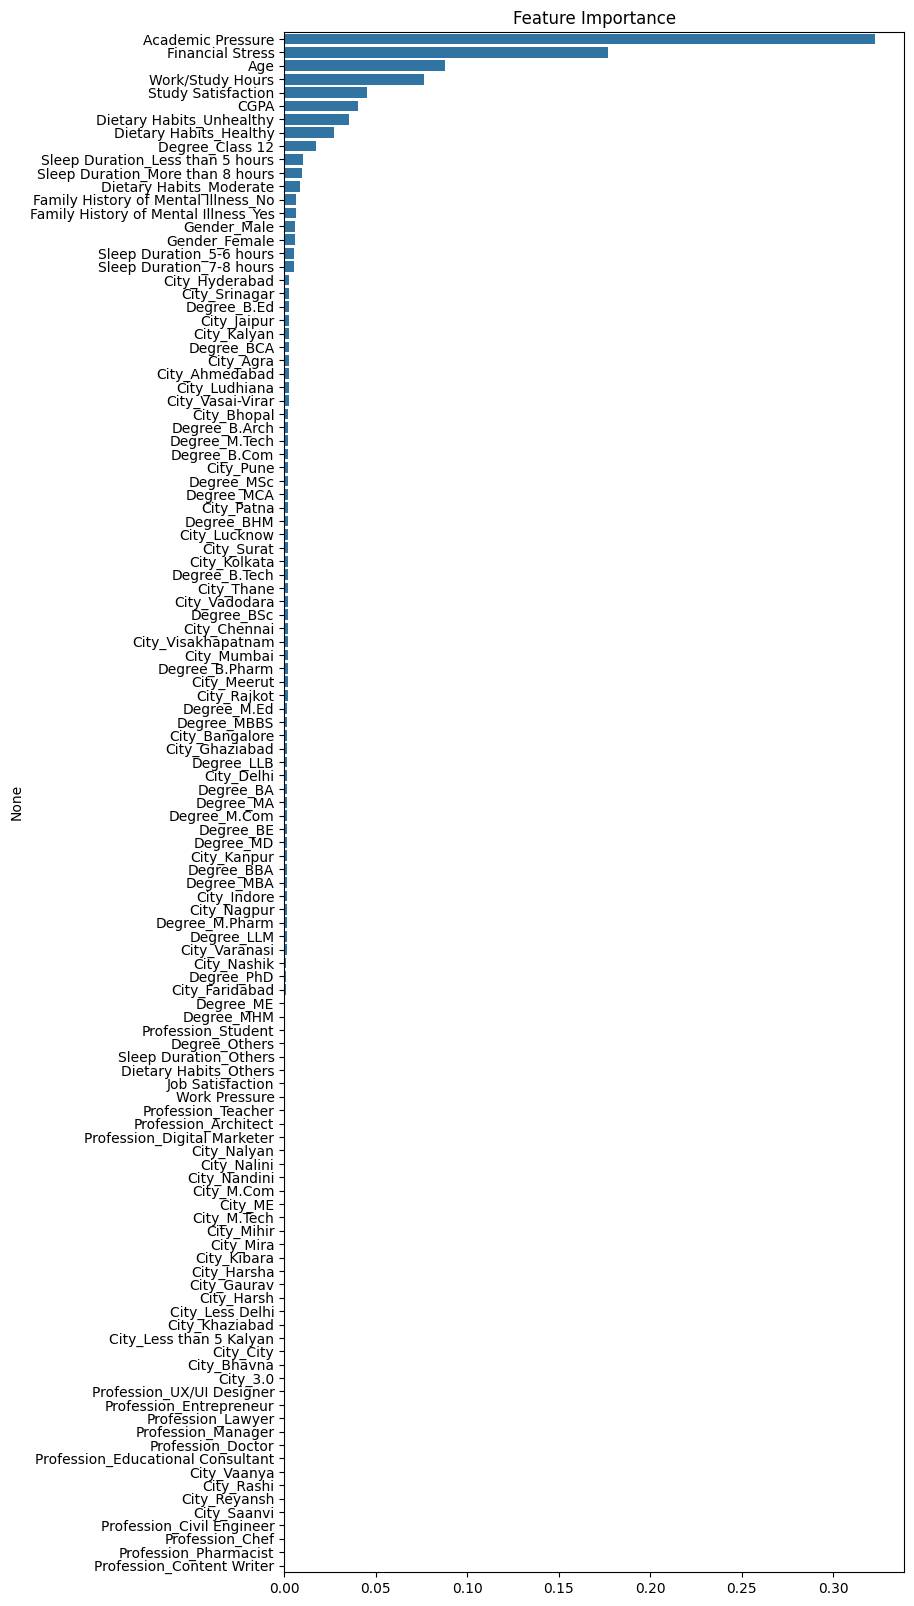

In [39]:
importances = pd.Series(model.feature_importances_, index=X_train.columns)
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(8,20))
sns.barplot(x=importances.values, y=importances.index)
plt.title("Feature Importance")

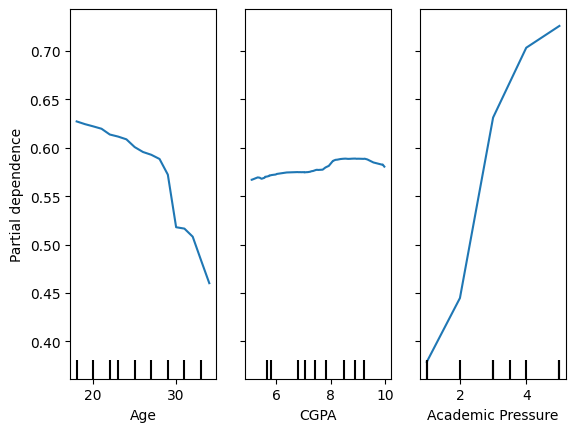

In [40]:
PartialDependenceDisplay.from_estimator(model, X_test.iloc[:100], features=['Age', 'CGPA', 'Academic Pressure'])

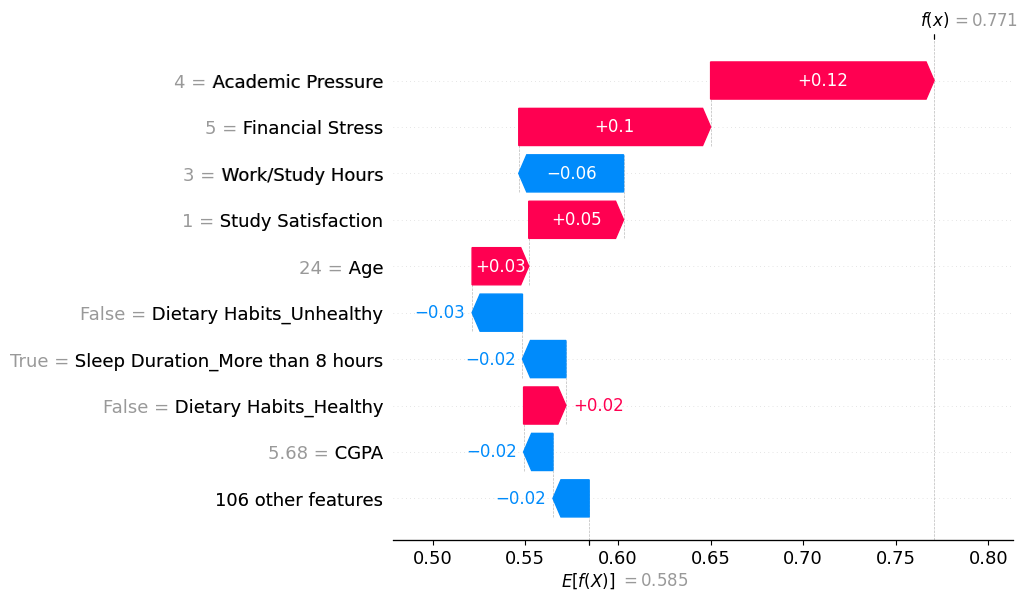

In [41]:
explainer = shap.TreeExplainer(model)
X_single = X_test.iloc[[interp_id]]

shap_values = explainer(X_single).values
base_values = explainer(X_single).base_values

shap.plots.waterfall(
    shap.Explanation(
        values=shap_values[0,:,1],
        base_values=base_values[0,1],
        data=X_single.iloc[0]
    )
)


# Gradient boosting

In [42]:
X = df.drop(columns=target_var + ['id'])
y = df[target_var[0]]

categorical_columns = [c for c in categorical_columns if c in X.columns]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

model = CatBoostClassifier(
    iterations=2000,
    depth=8,
    learning_rate=0.05,
    eval_metric='F1',
    random_seed=0,
    verbose=100,
    early_stopping_rounds=50,
    thread_count=-1
)

model.fit(X_train, y_train, cat_features=categorical_columns)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)

f1_train, f1_test

0:	learn: 0.8536804	total: 64.1ms	remaining: 2m 8s
100:	learn: 0.8851518	total: 991ms	remaining: 18.6s
200:	learn: 0.8938482	total: 1.79s	remaining: 16.1s
300:	learn: 0.9027615	total: 2.7s	remaining: 15.2s
400:	learn: 0.9111851	total: 3.57s	remaining: 14.3s
500:	learn: 0.9185659	total: 4.56s	remaining: 13.6s
600:	learn: 0.9257524	total: 5.55s	remaining: 12.9s
700:	learn: 0.9321430	total: 6.57s	remaining: 12.2s
800:	learn: 0.9396960	total: 7.48s	remaining: 11.2s
900:	learn: 0.9478955	total: 8.47s	remaining: 10.3s
1000:	learn: 0.9542726	total: 9.47s	remaining: 9.45s
1100:	learn: 0.9588472	total: 10.4s	remaining: 8.52s
1200:	learn: 0.9640340	total: 11.4s	remaining: 7.58s
1300:	learn: 0.9684573	total: 12.4s	remaining: 6.65s
1400:	learn: 0.9729803	total: 13.4s	remaining: 5.72s
1500:	learn: 0.9763330	total: 14.4s	remaining: 4.78s
1600:	learn: 0.9799809	total: 15.5s	remaining: 3.87s
1700:	learn: 0.9831001	total: 16.5s	remaining: 2.9s
1800:	learn: 0.9854598	total: 17.5s	remaining: 1.93s
1900:	

(0.9376466341815557, 0.8671341407886349)

In [43]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80      3799
           1       0.85      0.88      0.87      5408

    accuracy                           0.84      9207
   macro avg       0.84      0.83      0.84      9207
weighted avg       0.84      0.84      0.84      9207



In [44]:
model.predict_proba(X_test.iloc[[interp_id]])

array([[0.03687275, 0.96312725]])

Text(0.5, 1.0, 'Feature Importance')

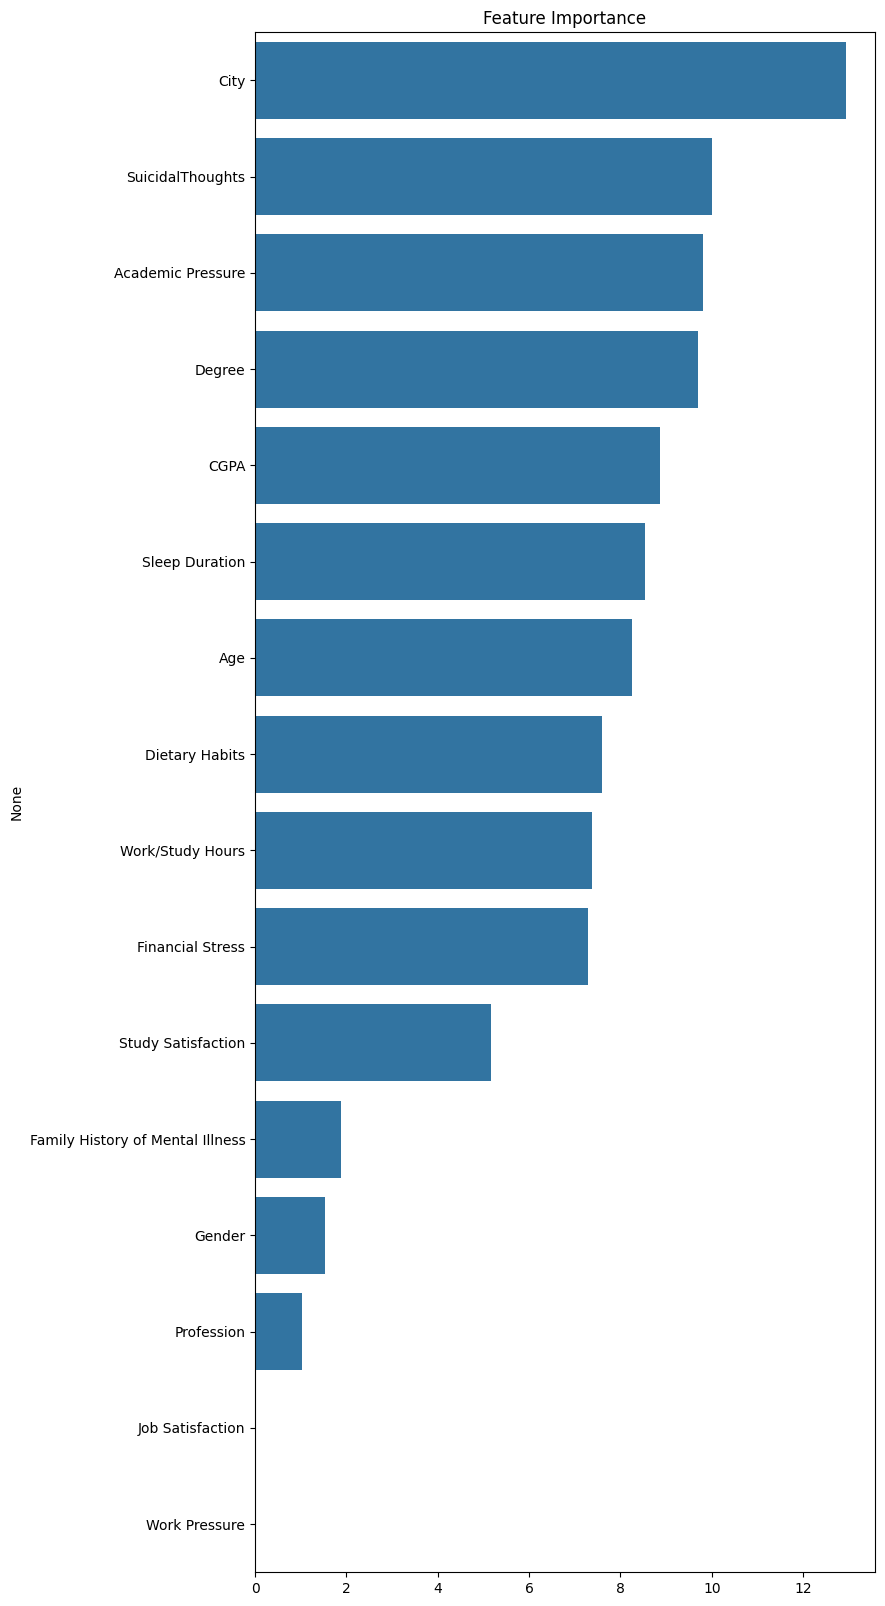

In [45]:
importances = pd.Series(model.get_feature_importance(), index=X_train.columns)
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(8,20))
sns.barplot(x=importances.values, y=importances.index)
plt.title("Feature Importance")

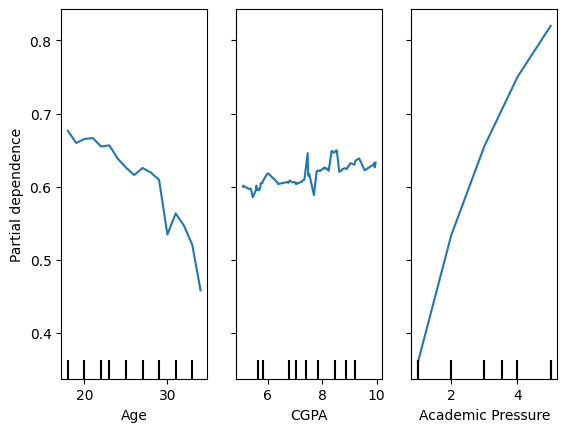

In [46]:
PartialDependenceDisplay.from_estimator(model, X_test.iloc[:100], features=['Age', 'CGPA', 'Academic Pressure'])

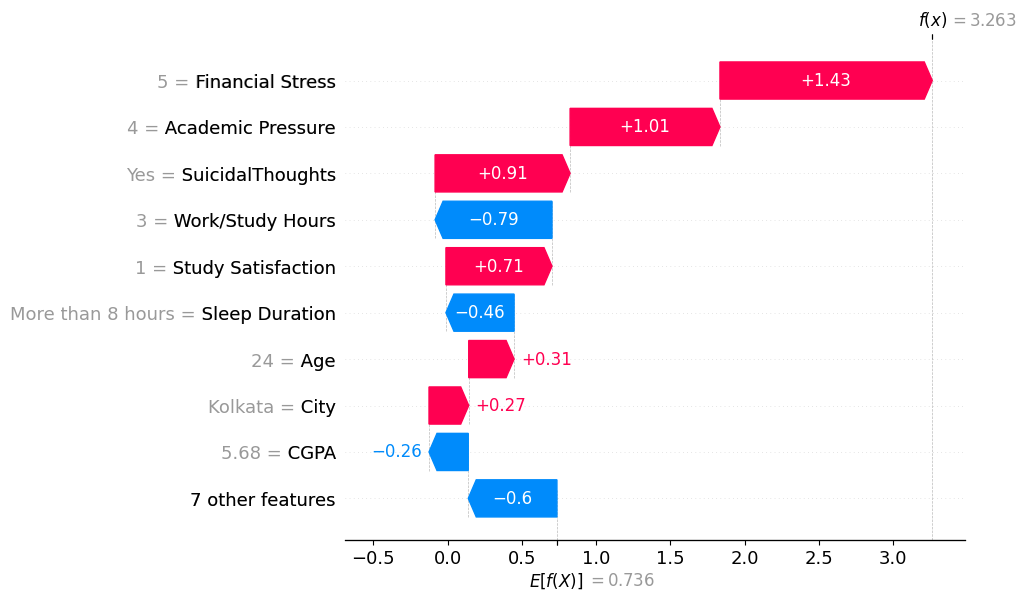

In [47]:
explainer = shap.TreeExplainer(model)
X_single = X_test.iloc[[interp_id]]

shap_values = explainer(X_single).values
base_values = explainer(X_single).base_values

shap.plots.waterfall(
    shap.Explanation(
        values=shap_values[0],
        base_values=base_values[0],
        data=X_single.iloc[0]
    )
)

# Sugeno integral

In [48]:
target_var = ['Depression']

categorical_values = {
    'Sleep Duration': 0.8 / 4.9,
    'Dietary Habits': 0.4 / 4.9
}

numeric_values_inv = {
    'Study Satisfaction': 0.6 / 4.9,
    'Job Satisfaction': 0.7 / 4.9
}

numeric_values = {
    'Academic Pressure': 0.7 / 4.9,
    'Work Pressure': 0.6 / 4.9,
    'Work/Study Hours': 0.3 / 4.9,
    'Financial Stress': 0.8 / 4.9
}


numeric_values_max = df[numeric_values.keys()].max() * 1.2
numeric_values_inv_max = df[numeric_values_inv.keys()].max() * 1.2

sleep_duration_defuzz = {
    'Less than 5 hours': 0.9,
    '5-6 hours': 0.6,
    '7-8 hours': 0.1,
    'More than 8 hours': 0.4,
    'Others': 0.7
}

dietary_habits_defuzz = {
    'Healthy': 0.1,
    'Unhealthy': 0.85,
    'Moderate': 0.3,
    'Others': 0.5
}

categorical_values_defuzz = {
    'Sleep Duration': sleep_duration_defuzz,
    'Dietary Habits': dietary_habits_defuzz
}

# Все независимые переменные и соответствующие им веса
independent_vars = list(categorical_values.keys()) + list(numeric_values.keys()) + list(numeric_values_inv.keys())
independent_vars_weights = categorical_values | numeric_values | numeric_values_inv

# Выполнение преобразований для фазификации данных

Чем выше значение переменной, тем выше её влияние на депрессию

In [49]:
df = df[
    independent_vars + target_var
    ]
df.loc[:, numeric_values.keys()] = df[numeric_values.keys()] / numeric_values_max
df.loc[:, numeric_values_inv.keys()] = 1 - df[numeric_values_inv.keys()] / numeric_values_inv_max

for col, mapping in categorical_values_defuzz.items():
    df.loc[:, col] = df[col].map(mapping)

df

,Sleep Duration,Dietary Habits,Academic Pressure,Work Pressure,Work/Study Hours,Financial Stress,Study Satisfaction,Job Satisfaction,Depression
0,0.6,0.1,0.833333,0.0,0.208333,0.166667,0.666667,1.0,1
1,0.6,0.3,0.333333,0.0,0.208333,0.333333,0.166667,1.0,0
2,0.9,0.1,0.500000,0.0,0.625000,0.166667,0.166667,1.0,0
3,0.1,0.3,0.500000,0.0,0.277778,0.833333,0.666667,1.0,1
4,0.6,0.3,0.666667,0.0,0.069444,0.166667,0.500000,1.0,0
...,...,...,...,...,...,...,...,...,...
27896,0.6,0.85,0.833333,0.0,0.486111,0.166667,0.166667,1.0,0
27897,0.9,0.1,0.333333,0.0,0.000000,0.500000,0.500000,1.0,0
27898,0.6,0.85,0.500000,0.0,0.833333,0.333333,0.333333,1.0,0
27899,0.9,0.1,0.833333,0.0,0.694444,0.833333,0.666667,1.0,1


# Реализация интеграла Сугено

In [50]:
def sugeno_integral(values: np.ndarray, weights: np.ndarray, verbose: bool = False) -> float:
    if len(values) != len(weights):
        raise ValueError("values и weights должны быть одинаковой длины")

    paired = sorted(zip(values, weights), key=lambda x: -x[0])
    sorted_values, weights_sorted = zip(*paired)
    sorted_values = np.array(sorted_values)
    weights_sorted = np.array(weights_sorted)

    cum_weights = np.cumsum(weights_sorted)[::-1]

    mins = np.minimum(sorted_values[::-1], cum_weights)

    result = np.max(mins)

    if verbose:
        print("Исходные значения:", values)
        print("Исходные веса:", weights)
        print("\nПосле сортировки по убыванию значений:")
        print("Значения:", sorted_values)
        print("Веса:", weights_sorted)
        print("\nКумулятивная сумма весов от текущего элемента до конца:", cum_weights)
        print("\nМинимумы между отсортированными значениями (по возрастанию) и кум. суммами:", mins)
        print("\nИнтеграл Сугено (максимум из минимумов):", result)

    return result


Применение интеграла сугено для ранжирования студентов по степени депрессии

In [51]:
integral_values = list()
cols, weights = zip(*independent_vars_weights.items())
df_sugeno = df.loc[:, list(cols)]
df['SugenoIntegral'] = df_sugeno.apply(lambda row: sugeno_integral(row, weights), axis=1)
df

,Sleep Duration,Dietary Habits,Academic Pressure,Work Pressure,Work/Study Hours,Financial Stress,Study Satisfaction,Job Satisfaction,Depression,SugenoIntegral
0,0.6,0.1,0.833333,0.0,0.208333,0.166667,0.666667,1.0,1,0.571429
1,0.6,0.3,0.333333,0.0,0.208333,0.333333,0.166667,1.0,0,0.333333
2,0.9,0.1,0.500000,0.0,0.625000,0.166667,0.166667,1.0,0,0.500000
3,0.1,0.3,0.500000,0.0,0.277778,0.833333,0.666667,1.0,1,0.500000
4,0.6,0.3,0.666667,0.0,0.069444,0.166667,0.500000,1.0,0,0.500000
...,...,...,...,...,...,...,...,...,...,...
27896,0.6,0.85,0.833333,0.0,0.486111,0.166667,0.166667,1.0,0,0.530612
27897,0.9,0.1,0.333333,0.0,0.000000,0.500000,0.500000,1.0,0,0.500000
27898,0.6,0.85,0.500000,0.0,0.833333,0.333333,0.333333,1.0,0,0.500000
27899,0.9,0.1,0.833333,0.0,0.694444,0.833333,0.666667,1.0,1,0.673469


Студенты, у которых высокое значение интеграла Сугено действительно имеют депрессию, а те, у которых низкое значение, не имеют депрессии. Это означает, что интеграл Сугено работает правильно в данном случае

Разделение на тренировочную и тестовую выборки для того, чтобы можно было найти пороговое значение интеграла и оценить качество разделения

In [52]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Depression', axis=1), df['Depression'], test_size=0.33, random_state=0)

In [53]:
def calculat_f1(threshold):
    preds = (X_train['SugenoIntegral'] > threshold[0]).astype(np.int32)
    return f1_score(y_train, preds) + f1_score(1 - y_train, 1 - preds)

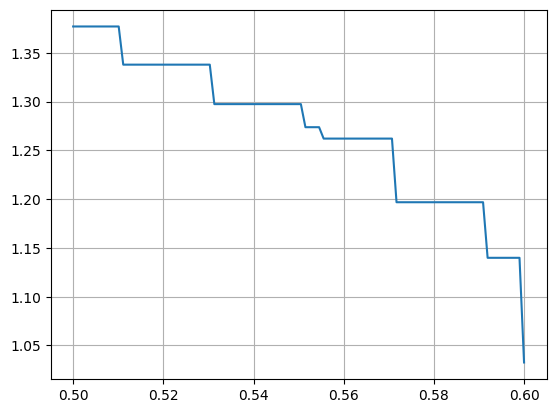

In [54]:
length = 100

thresh_values = np.linspace(0.5, 0.6, length)[..., None]
f1_values = np.zeros(length)

for idx, thresh in enumerate(thresh_values):
    f1_values[idx] = calculat_f1(thresh)

plt.plot(thresh_values, f1_values)
plt.grid(True)

Разделяющее значение

In [55]:
threshold = 0.53

Оценка качества классификацкации по тренировочной и тестовой выборке. Точность равна 0.71, что является удовлетворительным результатом

In [56]:
y_pred_train = (X_train['SugenoIntegral'] > threshold).astype(np.int32)
y_pred_test = (X_test['SugenoIntegral'] > threshold).astype(np.int32)

In [57]:
f1_score(y_train, y_pred_train), f1_score(y_test, y_pred_test)

(0.6571618772883613, 0.6608985024958403)

In [58]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.57      0.83      0.67      3799
           1       0.83      0.55      0.66      5408

    accuracy                           0.67      9207
   macro avg       0.70      0.69      0.67      9207
weighted avg       0.72      0.67      0.67      9207



In [59]:
sugeno_integral(X_test.iloc[interp_id].drop('SugenoIntegral'), weights, True)

Исходные значения: Sleep Duration             0.4
Dietary Habits             0.3
Academic Pressure     0.666667
Work Pressure              0.0
Work/Study Hours      0.208333
Financial Stress      0.833333
Study Satisfaction    0.833333
Job Satisfaction           1.0
Name: 9771, dtype: object
Исходные веса: (0.16326530612244897, 0.08163265306122448, 0.14285714285714285, 0.12244897959183672, 0.06122448979591836, 0.16326530612244897, 0.12244897959183672, 0.14285714285714285)

После сортировки по убыванию значений:
Значения: [1.         0.83333333 0.83333333 0.66666667 0.4        0.3
 0.20833333 0.        ]
Веса: [0.14285714 0.16326531 0.12244898 0.14285714 0.16326531 0.08163265
 0.06122449 0.12244898]

Кумулятивная сумма весов от текущего элемента до конца: [1.         0.87755102 0.81632653 0.73469388 0.57142857 0.42857143
 0.30612245 0.14285714]

Минимумы между отсортированными значениями (по возрастанию) и кум. суммами: [0.         0.20833333 0.3        0.4        0.57142857 0.42857143


np.float64(0.5714285714285714)

# Lazy FCA

In [60]:
from typing import Any, List
from joblib import Parallel, delayed
from tqdm import tqdm

In [61]:
class LazyClassifierFCA:
    def __init__(self):
        self.X_train = None
        self.y_train = None

    def fit(self, X_train: pd.DataFrame, y_train: pd.Series) -> None:
        self.X_train = X_train
        self.y_train = y_train
        
    def classify_sample(self, sample: pd.Series) -> Any:
        # Split X_train into positive and negative classes
        X_train_positive = self.X_train[y_train == 1]
        X_train_negative = self.X_train[y_train == 0]
        
        positive_classifiers = 0
        negative_classifiers = 0

        # Split the each part into binary and numerical
        binary_X_train_positive = X_train_positive.select_dtypes(include='bool')
        numerical_X_train_positive = X_train_positive.select_dtypes(exclude='bool')
        binary_X_train_negative = X_train_negative.select_dtypes(include='bool')
        numerical_X_train_negative = X_train_negative.select_dtypes(exclude='bool')
        
        
        def find_number_of_positive_and_negative_matches(binary_intersection, numerical_intervals):
            # Binary condition: Matches the binary intersection
            binary_positive_match = (binary_X_train_positive | ~binary_intersection).all(axis=1)
            binary_negative_match = (binary_X_train_negative | ~binary_intersection).all(axis=1)
    
            # Numerical condition: Lies within the intervals
            numerical_positive_match = numerical_X_train_positive.apply(
                lambda row: all(
                    interval[0] <= value <= interval[1] for value, interval in zip(row, numerical_intervals)
                ),
                axis=1
            )
            numerical_negative_match = numerical_X_train_negative.apply(
                lambda row: all(
                    interval[0] <= value <= interval[1] for value, interval in zip(row, numerical_intervals)
                ),
                axis=1
            )
            # print(f"pos_supp: \n {list(X_train_positive[(binary_positive_match & numerical_positive_match)].index)}")
            # print(f"neg_supp: \n {list(X_train_negative[(binary_negative_match & numerical_negative_match)].index)}")
            # Combine binary and numerical conditions
            num_positive = (binary_positive_match & numerical_positive_match).sum()
            num_negative = (binary_negative_match & numerical_negative_match).sum()
            return num_positive, num_negative
        
        # Function to check if intersection with a train sample is a positive classifier
        def is_positive_classifier(binary_intersection, numerical_intervals):
            num_positive, num_negative = find_number_of_positive_and_negative_matches(binary_intersection, numerical_intervals)
            return num_negative == 0 and num_positive > 1
        
        # Function to check if intersection is a negative classifier
        def is_negative_classifier(binary_intersection, numerical_intervals):
            num_positive, num_negative = find_number_of_positive_and_negative_matches(binary_intersection, numerical_intervals)
            return num_positive == 0 and num_negative > 1
        
        # Check for positive classifiers by intersecting sample with each positive object
        for _, pos_sample in X_train_positive.iterrows():
            # Binary intersection: AND operation
            binary_intersection = sample[binary_X_train_positive.columns] & pos_sample[binary_X_train_positive.columns]
            
            # Numerical intersection: Interval
            numerical_intersection = [
                (min(sample[col], pos_sample[col]), max(sample[col], pos_sample[col]))
                for col in numerical_X_train_positive.columns
            ]
            # print({sample.name}, {pos_sample.name})
            # print(f"{sample=}")
            # print(f"{pos_sample=}")
            # print(f"{binary_intersection=} \n {numerical_intersection=}")
            
            # Combine intersections and check
            if is_positive_classifier(binary_intersection, numerical_intersection):
                positive_classifiers += 1
        
        # Check for negative classifiers by intersecting sample with each negative object
        for _, neg_sample in X_train_negative.iterrows():
            # Binary intersection: AND operation
            binary_intersection = sample[binary_X_train_negative.columns] & neg_sample[binary_X_train_negative.columns]
            
            # Numerical intersection: Interval
            numerical_intersection = [
                (min(sample[col], neg_sample[col]), max(sample[col], neg_sample[col]))
                for col in numerical_X_train_negative.columns
            ]
            
            # Combine intersections and check
            if is_negative_classifier(binary_intersection, numerical_intersection):
                negative_classifiers += 1

        # Determine the class based on the number of classifiers
        if positive_classifiers > negative_classifiers:
            # print(f"sample {sample.name} is classified as 1, {positive_classifiers=}, {negative_classifiers=}")
            return 1  # Predict positive
            
        elif negative_classifiers > positive_classifiers:
            # print(f"sample {sample.name} is classified as 0, {positive_classifiers=}, {negative_classifiers=}")
            return 0  # Predict negative

        else:
            # If equal, you can decide on a rule, like defaulting to 0 or 1, or returning 'undetermined'
            # print(f"sample {sample.name} is classified as 1, default, {positive_classifiers=}, {negative_classifiers=}")
        
            return 1  # or 0, depending on the choice


    # def predict(self, X_test: pd.DataFrame) -> List[Any]:
    #     # List to store predictions for each test sample
    #     predictions = []
        
    #     # Iterate through each sample in X_test
    #     for _, sample in X_test.iterrows():
    #         # Classify the sample and append the result to predictions
    #         prediction = self.classify_sample(sample)
    #         predictions.append(prediction)

    def predict(self, X_test: pd.DataFrame) -> List[Any]:
        # Parallelize classification of each sample
        predictions = Parallel(n_jobs=-1)(
            delayed(self.classify_sample)(sample) for _, sample in X_test.iterrows()
        )
        return predictions
        
        # return predictions

In [62]:
masks = ['Profession', 'Degree', 'id']
cols_to_drop = []
for m in masks:
    cols_to_drop.extend(df_numeric.filter(like=m).columns)

X = df_numeric.drop(columns=target_var + list(cols_to_drop))
y = df_numeric[target_var[0]]

X_train, X_test, y_train, y_test = train_test_split(X[:100], y[:100], test_size=0.33, random_state=0)

model = LazyClassifierFCA()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)

f1_train, f1_test


(1.0, 0.6153846153846154)